# Thesis Plotter

## Imports and Methods

In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.kinematic_cuts as cuts
import my_library.constants as constants
import my_library.gluex_style as gxs
import numpy as np
import pandas as pd
import os

Welcome to JupyROOT 6.24/04


In [2]:
def title_hists(hist: list, xtitle, ytitle, yoffset=None):
    for hist in hist:
        hist.GetXaxis().SetTitle(xtitle)
        hist.GetYaxis().SetTitle(ytitle)
        if yoffset:
            hist.GetYaxis().SetTitleOffset(yoffset)

    

# Make Plots for My Thesis 

## Luminosity table in latex form

In [3]:
for e in range(7, 12):
    e_lumi = tools.get_luminosity_gluex_1(e-0.5, e+0.5)
    print("{} & {:0.2f} \\\ \hline".format(e, e_lumi))

7 & 42.73 \\ \hline
8 & 141.07 \\ \hline
9 & 112.30 \\ \hline
10 & 70.81 \\ \hline
11 & 60.14 \\ \hline


## $\Delta t$ table in latex form

In [4]:
for tbin in range(1, 8):
    t_low, t_high = constants.T_CUT_DICT[tbin]
    t_bin_middle = (t_low + t_high) / 2
    t_bin_width = t_high - t_low
    print('{:0.3f} & {:0.3f} \\\ \hline'.format(t_bin_middle, t_bin_width))

0.150 & 0.100 \\ \hline
0.250 & 0.100 \\ \hline
0.350 & 0.100 \\ \hline
0.525 & 0.250 \\ \hline
0.775 & 0.250 \\ \hline
1.150 & 0.500 \\ \hline
1.650 & 0.500 \\ \hline


## PID Timing Table

In [5]:
timing_dict = {
    '$pi^+$': (1.0, 0.5, 2.0, 2.5),
    '$pi^-$': (1.0, 0.5, 2.0, 2.5),
    '$K^+$': (0.75, 0.3, 2.5, 2.5),
    '$K^-$': (0.75, 0.3, 2.5, 2.5),
    '$p$': (1.0, 0.6, 2.0, 2.5)
}

for particle in timing_dict:
    timing = timing_dict[particle]
    print('{} & $\pm {:0.2f}$ & $\pm {:0.2f}$ & $\pm {:0.2f}$ & $\pm {:0.2f}$ \\\ \hline'.format(particle, *timing))

$pi^+$ & $\pm 1.00$ & $\pm 0.50$ & $\pm 2.00$ & $\pm 2.50$ \\ \hline
$pi^-$ & $\pm 1.00$ & $\pm 0.50$ & $\pm 2.00$ & $\pm 2.50$ \\ \hline
$K^+$ & $\pm 0.75$ & $\pm 0.30$ & $\pm 2.50$ & $\pm 2.50$ \\ \hline
$K^-$ & $\pm 0.75$ & $\pm 0.30$ & $\pm 2.50$ & $\pm 2.50$ \\ \hline
$p$ & $\pm 1.00$ & $\pm 0.60$ & $\pm 2.00$ & $\pm 2.50$ \\ \hline


## Fit Variation Max Impact Table

In [6]:
var_names = {'pol1': "1st-Order Polynomial", 'pol3': "3rd-Order Polynomial", 'floatgausmeanleft': "Fix Value of Gaussian Width at $-1\sigma$ Relative to Nominal", 
            "floatvoigtwidth": "Allow Gaus Width to Float", 'wideleft': "Wider Fit Range (Low Side)", 'wideright': "Wider Fit Range (High Side)",
            'nogaus': "No Gaussian Component", "wideboth": "Wider Fit Range on Both Sides"}
channel_names = {'pipkmks': '$\pi^+K^-K_s$', 'pimkpks': '$\pi^-K^+K_s$' }

fit_sys_df = pd.read_csv('/work/halld/home/viducic/systematic_errors/max_changes.csv')
fit_sys_df['mag_percent_change'] = np.abs(fit_sys_df['max_percent_change'])
fit_sys_grouped = fit_sys_df.groupby('channel')
for channel, group in fit_sys_grouped:
    # print(f'{channel_names[channel]} & {group["mag_percent_change"].mean():0.3f} & {group["mag_percent_change"].std():0.3f} \\\ \hline')
    # table_str = '$E_\gamma & -t & Variation & |(Varied - Nominal)|/Nominal \\\ \hline'
    # print(table_str)
    # table_start = '\\begin{table} \n \
    print("\\begin{table}\n\
\centering \n\
\\begin{tabular}{| c | c | c | c |} \n\
\hline						\n\
\\boldmath$E_\gamma$ \\textbf{[GeV]} & \\boldmath$-t ~\\textbf{[GeV}^2]\\textbf{]}$ & \\textbf{Variation} & \\textbf{|(Varied - Nominal)|/Nominal} \\\ \hline")
    for index, row in group.iterrows():
        t_middle = constants.T_CUT_DICT[row['t']][0] + constants.T_WIDTH_DICT[row['t']] / 2
        table_str = '{} & {:0.3f} & {} & {:0.3f} \\\ \hline'.format(row['e'], t_middle, var_names[row['max_var']], np.abs(row['max_percent_change']))
        print(table_str)
    print("\end{tabular} \n\
\caption{Fit systematic for each $E_\gamma$ and $-t$ bin for " + channel_names[channel] + "  decay mode}\label{table:" + channel + "_fit_sys}  \n\
\end{table} ")
    print('\n')

\begin{table}
\centering 
\begin{tabular}{| c | c | c | c |} 
\hline						
\boldmath$E_\gamma$ \textbf{[GeV]} & \boldmath$-t ~\textbf{[GeV}^2]\textbf{]}$ & \textbf{Variation} & \textbf{|(Varied - Nominal)|/Nominal} \\ \hline
8 & 0.150 & 1st-Order Polynomial & 0.152 \\ \hline
8 & 0.250 & No Gaussian Component & 0.060 \\ \hline
8 & 0.350 & No Gaussian Component & 0.071 \\ \hline
8 & 0.525 & No Gaussian Component & 0.039 \\ \hline
8 & 0.775 & No Gaussian Component & 0.057 \\ \hline
8 & 1.150 & 1st-Order Polynomial & 0.097 \\ \hline
8 & 1.650 & 1st-Order Polynomial & 0.101 \\ \hline
9 & 0.150 & 1st-Order Polynomial & 0.201 \\ \hline
9 & 0.250 & 1st-Order Polynomial & 0.097 \\ \hline
9 & 0.350 & No Gaussian Component & 0.055 \\ \hline
9 & 0.525 & No Gaussian Component & 0.043 \\ \hline
9 & 0.775 & 1st-Order Polynomial & 0.070 \\ \hline
9 & 1.150 & 1st-Order Polynomial & 0.081 \\ \hline
9 & 1.650 & 1st-Order Polynomial & 0.117 \\ \hline
10 & 0.150 & 1st-Order Polynomial & 0.423 \\ \hline
10 

## Fit Variation Statistical Description Table

In [7]:
# \begin{table}
# \centering
# \begin{tabular}{| c | c | c |} 
# \hline						
# \textbf{Channel} & \textbf{Mean} & \textbf{Std. Dev.} \\ \hline
# $\pi^-K^+K_s$ & 0.026 & 0.017 \\ \hline
# $\pi^+K^-K_s$ & 0.027 & 0.017 \\ \hline
# \end{tabular}
# \caption{Statistical description of the systematic uncertainty from the fitting procedure}\label{table:fit_sys_stats}
# \end{table}

print("\\begin{table}\n\
\centering \n\
\\begin{tabular}{| c | c | c |} \n\
\\hline \n\
\\textbf{Channel} & \\textbf{Mean} & \\textbf{Std. Dev.} \\\ \hline")

for channel, group in fit_sys_grouped:
    print(f'{channel_names[channel]} & {group["mag_percent_change"].mean():0.3f} & {group["mag_percent_change"].std():0.3f} \\\ \hline')

print("\end{tabular}\n\
\caption{Statistical description of the systematic uncertainty from the fitting procedure}\label{table:fit_sys_stats}\n\
\end{table}")


\begin{table}
\centering 
\begin{tabular}{| c | c | c |} 
\hline 
\textbf{Channel} & \textbf{Mean} & \textbf{Std. Dev.} \\ \hline
$\pi^-K^+K_s$ & 0.135 & 0.109 \\ \hline
$\pi^+K^-K_s$ & 0.156 & 0.099 \\ \hline
\end{tabular}
\caption{Statistical description of the systematic uncertainty from the fitting procedure}\label{table:fit_sys_stats}
\end{table}


## Cut Systematic Errors Table

In [8]:
df_sys_error = pd.read_csv('/work/halld/home/viducic/systematic_errors/cs_total_error.csv')
df_sys_error_pipkmks = df_sys_error[df_sys_error['channel'] == 'pipkmks']
df_sys_error_pimkpks = df_sys_error[df_sys_error['channel'] == 'pimkpks']

cut_sys_table_str = "\\begin{table}\n\
    \centering\n\
    \\begin{tabular}{|c|c|c|c|}\n\
        \hline\n\
        \\boldmath$E_\gamma$ [GeV] & \\boldmath$-t$ [GeV$^2$] & \\boldmath$\delta_{\\textrm{cuts}}(K^-K_s\pi^+)$ &  \\boldmath$\delta_{\\textrm{cuts}}(K^+K_s\pi^-)$ \\\ \hline\n"

df_sys_grouped = df_sys_error.groupby(['e', 't'])
for (e, t), group in df_sys_grouped:
    t_middle = t
    pipkmks_err = group[group['channel'] == 'pipkmks']['cut_error'].values[0]
    pimkpks_err = group[group['channel'] == 'pimkpks']['cut_error'].values[0]
    cut_sys_table_str+=f'{e} & {t_middle:0.2f} & {pipkmks_err:0.3f} & {pimkpks_err:0.3f}  \\\ \hline \n'

cut_sys_table_str+='\end{tabular}\n\
    \caption{Values for the relative systematic uncertainty from event selection criteria $\delta_{\\textrm{cuts}}$ for each $E_\gamma$ and $-t$ bin for both charge conjugated decay modes of the $f_1(1285)\\rightarrow K^\mp K_s \pi^\pm$ as described in Eqn.[\\ref{eqn:cut_sys}]}\n\
    \label{table:sys_cut_values}\n\
\end{table}'

print(cut_sys_table_str)

\begin{table}
    \centering
    \begin{tabular}{|c|c|c|c|}
        \hline
        \boldmath$E_\gamma$ [GeV] & \boldmath$-t$ [GeV$^2$] & \boldmath$\delta_{\textrm{cuts}}(K^-K_s\pi^+)$ &  \boldmath$\delta_{\textrm{cuts}}(K^+K_s\pi^-)$ \\ \hline
8 & 0.15 & 0.125 & 0.129  \\ \hline 
8 & 0.25 & 0.137 & 0.139  \\ \hline 
8 & 0.35 & 0.083 & 0.151  \\ \hline 
8 & 0.53 & 0.139 & 0.126  \\ \hline 
8 & 0.78 & 0.083 & 0.109  \\ \hline 
8 & 1.15 & 0.074 & 0.096  \\ \hline 
8 & 1.65 & 0.137 & 0.082  \\ \hline 
9 & 0.15 & 0.106 & 0.112  \\ \hline 
9 & 0.25 & 0.131 & 0.128  \\ \hline 
9 & 0.35 & 0.071 & 0.107  \\ \hline 
9 & 0.53 & 0.092 & 0.105  \\ \hline 
9 & 0.78 & 0.089 & 0.139  \\ \hline 
9 & 1.15 & 0.065 & 0.167  \\ \hline 
9 & 1.65 & 0.151 & 0.112  \\ \hline 
10 & 0.15 & 0.167 & 0.105  \\ \hline 
10 & 0.25 & 0.076 & 0.150  \\ \hline 
10 & 0.35 & 0.052 & 0.094  \\ \hline 
10 & 0.53 & 0.066 & 0.142  \\ \hline 
10 & 0.78 & 0.052 & 0.151  \\ \hline 
10 & 1.15 & 0.086 & 0.097  \\ \hline 
10 & 1.65 

## Fit Variation Value Tables

In [9]:
fit_vars = ['pol1', 'pol3', 'nogaus',
            'wideleft', 'wideright', 'wideboth', 'narrowleft', 'narrowright', 'narrowboth',
            'floatvoigtwidthleft', 'floatvoigtwidthright',
            'floatgausmeanleft', 'floatgausmeanright', 'floatgauswidthleft', 'floatgauswidthright']

fit_var_descriptions = {'pol1': 'using a 1st-order polynomial for phasespace background', 'pol3': 'using a 3rd-order polynomial for phasespace background',
                        'nogaus': 'removing gaussian component that descrives resonant tails from full model', 'wideleft': 'fitting the model over a wider range on low $M(KK\pi)$ side',
                        'wideright': 'fitting the model over a wider range on the high $M(KK\pi)$ side', 'wideboth': 'fitting the model over a wider range on both sides of $M(KK\pi)$',
                        'narrowleft': 'fitting the model over a narrower range on the low $M(KK\pi)$ side', 'narrowright': 'fitting the model over a narrower range on the high $M(KK\pi)$ side',
                        'narrowboth': 'fitting the model over a narrower range on both sides of $M(KK\pi)$', 'floatvoigtwidthleft': 'fixing the voigtian width to be $1\sigma$ smaller than the nominal value, as given in Table [\\ref{table:fit_results}],',
                        'floatvoigtwidthright': 'fixing the voigtian width to be $1\sigma$ larger than the nominal value, as given in Table [\\ref{table:fit_results}],',
                        'floatgausmeanleft': 'fixing the gaussian mean to be $1\sigma$ smaller than the nominal value, as given in Table [\\ref{table:gaus_values}],',
                        'floatgausmeanright': 'fixing the gaussian mean to be $1\sigma$ larger than the nominal value, as given in Table [\\ref{table:gaus_values}],',
                        'floatgauswidthleft': 'fixing the gaussian width to be $1\sigma$ smaller than the nominal value, as given in Table [\\ref{table:gaus_values}],',
                        'floatgauswidthright': 'fixing the gaussian width to be $1\sigma$ larger than the nominal value, as given in Table [\\ref{table:gaus_values}],'}

df_fit_errors = pd.read_csv('/work/halld/home/viducic/systematic_errors/fit_variation_data_with_percent_change.csv')

table_start = '\\begin{table} \n \
\centering \n \
\\begin{tabular}{| c | c | c | c |} \n \
\hline						\n \
\\boldmath$E_\gamma \left[\\textbf{GeV}\\right] $ &\\boldmath$-t \left[\\textbf{GeV}^2\\right]$ & \\boldmath$|\delta_{i} (K^-K_s\pi^+)|$ & \\boldmath$|\delta_{i} (K^-K_s\pi^+)|$ \\\ \hline'


fits_grouped = df_fit_errors.groupby(['e', 't'])

for var in fit_vars:
    print(table_start)
    for (e, t), group in fits_grouped:
        if e == 12:
            continue
        table_end = '\end{tabular} \n \
        \caption{Relative difference from nominal for ' + fit_var_descriptions[var] + ' for each $E_\gamma$ and $-t$ bin for $\pi^+K^-K_s$ and $\pi^-K^+K_s$ decay modes}\label{table:fit_sys_' + var + '} \n \
        \end{table}'

        pipkmks_rel_error = group[(group['channel'] == 'pipkmks')][f'{var}_percent_change'].values[0]
        pimkpks_rel_error = group[(group['channel'] == 'pimkpks')][f'{var}_percent_change'].values[0]
        t_middle = constants.T_CUT_DICT[t][0] + constants.T_WIDTH_DICT[t] / 2
        table_str = '{} & {:0.2f} & {:0.3f} & {:0.3f} \\\ \hline'.format(e, t_middle, abs(pipkmks_rel_error), abs(pimkpks_rel_error))
        print(table_str)
    print(table_end)
    print("%=== " + var + " ===")
    print("\n")

\begin{table} 
 \centering 
 \begin{tabular}{| c | c | c | c |} 
 \hline						
 \boldmath$E_\gamma \left[\textbf{GeV}\right] $ &\boldmath$-t \left[\textbf{GeV}^2\right]$ & \boldmath$|\delta_{i} (K^-K_s\pi^+)|$ & \boldmath$|\delta_{i} (K^-K_s\pi^+)|$ \\ \hline
8 & 0.15 & 0.023 & 0.152 \\ \hline
8 & 0.25 & 0.019 & 0.035 \\ \hline
8 & 0.35 & 0.065 & 0.036 \\ \hline
8 & 0.53 & 0.037 & 0.023 \\ \hline
8 & 0.78 & 0.063 & 0.040 \\ \hline
8 & 1.15 & 0.105 & 0.097 \\ \hline
8 & 1.65 & 0.189 & 0.101 \\ \hline
9 & 0.15 & 0.196 & 0.201 \\ \hline
9 & 0.25 & 0.009 & 0.097 \\ \hline
9 & 0.35 & 0.007 & 0.033 \\ \hline
9 & 0.53 & 0.065 & 0.030 \\ \hline
9 & 0.78 & 0.090 & 0.070 \\ \hline
9 & 1.15 & 0.096 & 0.081 \\ \hline
9 & 1.65 & 0.129 & 0.117 \\ \hline
10 & 0.15 & 0.306 & 0.423 \\ \hline
10 & 0.25 & 0.196 & 0.178 \\ \hline
10 & 0.35 & 0.054 & 0.091 \\ \hline
10 & 0.53 & 0.043 & 0.066 \\ \hline
10 & 0.78 & 0.199 & 0.002 \\ \hline
10 & 1.15 & 0.142 & 0.071 \\ \hline
10 & 1.65 & 0.145 & 0.207 \\ \hlin

## Gaussian Mean/Width Table

In [10]:
gaus_table = '\\begin{table} \n \
\centering \n \
\\begin{tabular}{| c | c | c |} \n \
\hline						\n \
\\textbf{Channel} & \\textbf{Mean [MeV]} & \\textbf{Width [MeV]} \\\ \hline \n'

gaus_table += f'\\boldmath$K^-K_s\pi^+$ & ${1000*constants.F1_PIPKMKS_GAUS_MEAN:0.2f} \pm {1000*constants.F1_PIPKMKS_GAUS_MEAN_ERROR:0.2f}$  & ${1000*constants.F1_PIPKMKS_GAUS_WIDTH:0.2f} \pm {1000*constants.F1_PIPKMKS_GAUS_WIDTH_ERROR:0.2f}$ \\\ \hline \n'
gaus_table += f'\\boldmath$K^+K_s\pi^-$ & ${1000*constants.F1_PIMKPKS_GAUS_MEAN:0.2f} \pm {1000*constants.F1_PIMKPKS_GAUS_MEAN_ERROR:0.2f}$  & ${1000*constants.F1_PIMKPKS_GAUS_WIDTH:0.2f} \pm {1000*constants.F1_PIMKPKS_GAUS_WIDTH_ERROR:0.2f}$ \\\ \hline\n'


gaus_table += '\end{tabular} \n \
\caption{Mean and width for gaussian component in fit to integrated $M(KK\pi)$ distributions for both $\pi^+K^-K_s$ and $\pi^-K^+K_s$ decay modes}\label{table:gaus_values} \n \
\end{table}'

print(gaus_table)

\begin{table} 
 \centering 
 \begin{tabular}{| c | c | c |} 
 \hline						
 \textbf{Channel} & \textbf{Mean [MeV]} & \textbf{Width [MeV]} \\ \hline 
\boldmath$K^-K_s\pi^+$ & $1371.80 \pm 4.05$  & $34.56 \pm 4.62$ \\ \hline 
\boldmath$K^+K_s\pi^-$ & $1362.60 \pm 4.15$  & $42.85 \pm 3.93$ \\ \hline
\end{tabular} 
 \caption{Mean and width for gaussian component in fit to integrated $M(KK\pi)$ distributions for both $\pi^+K^-K_s$ and $\pi^-K^+K_s$ decay modes}\label{table:gaus_values} 
 \end{table}


## Binned Fit Table

In [11]:
pipkmks_binned_fit_df = pd.read_csv("/work/halld/home/viducic/data/fit_params/pipkmks/tf1_gaus_yield_values.csv")

yield_table = '\\begin{table} \n \
\centering \n \
\\begin{tabular}{| c | c | c | c | c |} \n \
\hline						\n \
\\boldmath$E_\\gamma$ & \\textbf{-t} & \\textbf{Yield} & \\textbf{Yield Uncertainty} &  \\boldmath$\chi^2/ndf$ \\\ \hline \n'
for row in pipkmks_binned_fit_df.iterrows():
    row = row[1]
    e = row['e']
    t = row['t']
    t_middle = constants.T_CUT_DICT[t][0] + constants.T_WIDTH_DICT[t] / 2
    f1_yield = row['yield']
    yield_error = row['yield_err']
    chi2ndf = row['chi2ndf']
    yield_table += f'{int(e)} & {t_middle:0.3f} & {f1_yield:0.2f}  & {yield_error:0.2f}  & {chi2ndf:0.2f} \\\ \hline \n'
    

yield_table += '\end{tabular} \n \
\caption{Yield, uncertainty, and fit quality for $ f_1(1285) \\rightarrow K^-K_s\pi^+$ decay mode for each $E_\\gamma$ and $-t$ bin}\label{table:yield_values} \n \
\end{table}'
print(yield_table)

\begin{table} 
 \centering 
 \begin{tabular}{| c | c | c | c | c |} 
 \hline						
 \boldmath$E_\gamma$ & \textbf{-t} & \textbf{Yield} & \textbf{Yield Uncertainty} &  \boldmath$\chi^2/ndf$ \\ \hline 
8 & 0.150 & 502.89  & 76.94  & 1.68 \\ \hline 
8 & 0.250 & 952.87  & 88.00  & 1.15 \\ \hline 
8 & 0.350 & 868.92  & 78.37  & 1.86 \\ \hline 
8 & 0.525 & 1467.27  & 92.01  & 1.25 \\ \hline 
8 & 0.775 & 844.71  & 63.38  & 1.28 \\ \hline 
8 & 1.150 & 747.94  & 67.24  & 1.21 \\ \hline 
8 & 1.650 & 167.04  & 32.35  & 0.90 \\ \hline 
9 & 0.150 & 392.25  & 61.07  & 0.99 \\ \hline 
9 & 0.250 & 733.27  & 81.62  & 1.50 \\ \hline 
9 & 0.350 & 573.36  & 71.85  & 0.87 \\ \hline 
9 & 0.525 & 1271.70  & 83.47  & 0.96 \\ \hline 
9 & 0.775 & 764.26  & 66.29  & 1.20 \\ \hline 
9 & 1.150 & 430.54  & 57.25  & 1.03 \\ \hline 
9 & 1.650 & 137.79  & 31.20  & 0.74 \\ \hline 
10 & 0.150 & 208.61  & 57.42  & 1.01 \\ \hline 
10 & 0.250 & 504.94  & 62.31  & 0.79 \\ \hline 
10 & 0.350 & 395.70  & 66.70  & 1.48 \\ \hli

In [12]:
pimkpks_binned_fit_df = pd.read_csv("/work/halld/home/viducic/data/fit_params/pimkpks/tf1_gaus_yield_values.csv")

yield_table = '\\begin{table} \n \
\centering \n \
\\begin{tabular}{| c | c | c | c | c |} \n \
\hline						\n \
\\boldmath$E_\\gamma$ & \\textbf{-t} & \\textbf{Yield} & \\textbf{Yield Uncertainty} &  \\boldmath$\chi^2/ndf$ \\\ \hline \n'
for row in pimkpks_binned_fit_df.iterrows():
    row = row[1]
    e = row['e']
    t = row['t']
    t_middle = constants.T_CUT_DICT[t][0] + constants.T_WIDTH_DICT[t] / 2
    f1_yield = row['yield']
    yield_error = row['yield_err']
    chi2ndf = row['chi2ndf']
    yield_table += f'{int(e)} & {t_middle:0.3f} & {f1_yield:0.2f}  & {yield_error:0.2f}  & {chi2ndf:0.2f} \\\ \hline \n'
    

yield_table += '\end{tabular} \n \
\caption{Yield, uncertainty, and fit quality for $f_1(1285) \\rightarrow K^+K_s\pi^-$ decay mode for each $E_\\gamma$ and $-t$ bin}\label{table:yield_values} \n \
\end{table}'
print(yield_table)

\begin{table} 
 \centering 
 \begin{tabular}{| c | c | c | c | c |} 
 \hline						
 \boldmath$E_\gamma$ & \textbf{-t} & \textbf{Yield} & \textbf{Yield Uncertainty} &  \boldmath$\chi^2/ndf$ \\ \hline 
8 & 0.150 & 663.89  & 63.40  & 0.81 \\ \hline 
8 & 0.250 & 1482.50  & 77.90  & 1.01 \\ \hline 
8 & 0.350 & 1487.59  & 74.55  & 1.06 \\ \hline 
8 & 0.525 & 2768.31  & 97.41  & 2.09 \\ \hline 
8 & 0.775 & 1218.01  & 66.31  & 0.77 \\ \hline 
8 & 1.150 & 746.63  & 57.45  & 1.29 \\ \hline 
8 & 1.650 & 141.74  & 30.34  & 0.83 \\ \hline 
9 & 0.150 & 511.03  & 55.71  & 1.29 \\ \hline 
9 & 0.250 & 1143.89  & 75.55  & 1.30 \\ \hline 
9 & 0.350 & 1248.80  & 72.17  & 1.13 \\ \hline 
9 & 0.525 & 2185.86  & 84.45  & 1.01 \\ \hline 
9 & 0.775 & 1023.70  & 66.32  & 1.03 \\ \hline 
9 & 1.150 & 571.53  & 66.05  & 1.74 \\ \hline 
9 & 1.650 & 126.09  & 28.59  & 0.71 \\ \hline 
10 & 0.150 & 257.14  & 44.36  & 1.17 \\ \hline 
10 & 0.250 & 585.52  & 55.15  & 1.19 \\ \hline 
10 & 0.350 & 577.22  & 63.00  & 1.49 \

## Scaling Factors Uncertainty Table

In [13]:
scale_dict={
    'Pion Tracking': 0.0658,
    'Proton Tracking': 0.05,
    'Overall Tracking': 0.1158,
    'Luminosity': 0.05,
    'Branching Fraction': 0.044,
    'Total': 0.1336
}

scaling_table = '\\begin{table} \n \
\centering \n \
\\begin{tabular}{| c | c |} \n \
\hline						\n \
\\textbf{Source} & \\textbf{Relative Uncertainty} \\boldmath$\delta$ \\\ \hline \n'
for source in scale_dict:
    if source != 'Total':
        scaling_table+= f'{source} & {scale_dict[source]:0.3f} \\\ \hline \n'
    else:
        scaling_table+='\\textbf{' + source + '} & \\textbf{' + str(scale_dict[source]) + '} \\\ \hline \n'
scaling_table += '\end{tabular} \n \
\caption{Source and values for various normalization uncertainties.}\label{table:scale_factor} \n \
\end{table}'

print(scaling_table)

\begin{table} 
 \centering 
 \begin{tabular}{| c | c |} 
 \hline						
 \textbf{Source} & \textbf{Relative Uncertainty} \boldmath$\delta$ \\ \hline 
Pion Tracking & 0.066 \\ \hline 
Proton Tracking & 0.050 \\ \hline 
Overall Tracking & 0.116 \\ \hline 
Luminosity & 0.050 \\ \hline 
Branching Fraction & 0.044 \\ \hline 
\textbf{Total} & \textbf{0.1336} \\ \hline 
\end{tabular} 
 \caption{Source and values for various normalization uncertainties.}\label{table:scale_factor} 
 \end{table}


## Total Uncertainty Table

In [14]:
# df_sys_error_pipkmks = df_sys_error[df_sys_error['channel'] == 'pipkmks']
# df_sys_error_pimkpks = df_sys_error[df_sys_error['channel'] == 'pimkpks']

total_error_table = '\\begin{table} \n \
\centering \n \
\\begin{tabular}{| c | c | c | c | c | c | c |} \n \
\hline						\n \
\\boldmath$E_\gamma ~[\\textbf{GeV}]$ & \\boldmath$-t ~[\\textbf{GeV}^2]$ & \\boldmath$\delta_\\textbf{stat}$ & \\boldmath$\delta_\\textbf{fit}$ & \\boldmath$\delta_\\textbf{cut}$ & \\boldmath$\delta_\\textbf{sys}$ & \\boldmath$\delta_\\textbf{total}$ \\\ \hline \n'
for row_pip in df_sys_error_pipkmks.iterrows():
    row_pip = row_pip[1]
    e = row_pip['e']
    t = row_pip['t']
    stat_error = row_pip['stat_error']
    fit_error = abs(row_pip['fit_error'])
    cut_error = row_pip['cut_error']
    sys_error = row_pip['sys_error']
    total_error = row_pip['total_percent_error']
    total_error_table += f'{e} & {t:0.3f} & {stat_error:0.3f} & {fit_error:0.3f} & {cut_error:0.3f} & {sys_error:0.3f} & \\textbf{{{total_error:0.3f}}} \\\ \hline \n'
total_error_table+= '\end{tabular} \n \
\caption{Individual contributions and total uncertaintainty for the bin-by-bin cross-section measurement of $f_1(1285)\\rightarrow KK\pi$ from the $f_1(1285)\\rightarrow K^-K_s\pi^+$ decay channel.}\label{table:pipkmks_total_error} \n \
\end{table}'

print(total_error_table)

\begin{table} 
 \centering 
 \begin{tabular}{| c | c | c | c | c | c | c |} 
 \hline						
 \boldmath$E_\gamma ~[\textbf{GeV}]$ & \boldmath$-t ~[\textbf{GeV}^2]$ & \boldmath$\delta_\textbf{stat}$ & \boldmath$\delta_\textbf{fit}$ & \boldmath$\delta_\textbf{cut}$ & \boldmath$\delta_\textbf{sys}$ & \boldmath$\delta_\textbf{total}$ \\ \hline 
8 & 0.150 & 0.149 & 0.117 & 0.125 & 0.171 & \textbf{0.227} \\ \hline 
8 & 0.250 & 0.093 & 0.133 & 0.137 & 0.192 & \textbf{0.213} \\ \hline 
8 & 0.350 & 0.090 & 0.074 & 0.083 & 0.111 & \textbf{0.143} \\ \hline 
8 & 0.525 & 0.065 & 0.063 & 0.139 & 0.152 & \textbf{0.165} \\ \hline 
8 & 0.775 & 0.074 & 0.116 & 0.083 & 0.143 & \textbf{0.161} \\ \hline 
8 & 1.150 & 0.093 & 0.105 & 0.074 & 0.128 & \textbf{0.158} \\ \hline 
8 & 1.650 & 0.197 & 0.189 & 0.137 & 0.234 & \textbf{0.305} \\ \hline 
9 & 0.150 & 0.151 & 0.196 & 0.106 & 0.222 & \textbf{0.269} \\ \hline 
9 & 0.250 & 0.112 & 0.101 & 0.131 & 0.166 & \textbf{0.200} \\ \hline 
9 & 0.350 & 0.128 & 0.103 & 0

In [15]:
total_error_table = '\\begin{table} \n \
\centering \n \
\\begin{tabular}{| c | c | c | c | c | c | c |} \n \
\hline						\n \
\\boldmath$E_\gamma ~[\\textbf{GeV}]$ & \\boldmath$-t ~[\\textbf{GeV}^2]$ & \\boldmath$\delta_\\textbf{stat}$ & \\boldmath$\delta_\\textbf{fit}$ & \\boldmath$\delta_\\textbf{cut}$ & \\boldmath$\delta_\\textbf{sys}$ & \\boldmath$\delta_\\textbf{total}$ \\\ \hline \n'
for row_pip in df_sys_error_pimkpks.iterrows():
    row_pip = row_pip[1]
    e = row_pip['e']
    t = row_pip['t']
    stat_error = row_pip['stat_error']
    fit_error = abs(row_pip['fit_error'])
    cut_error = row_pip['cut_error']
    sys_error = row_pip['sys_error']
    total_error = row_pip['total_percent_error']
    total_error_table += f'{e} & {t:0.3f} & {stat_error:0.3f} & {fit_error:0.3f} & {cut_error:0.3f} & {sys_error:0.3f} & \\textbf{{{total_error:0.3f}}} \\\ \hline \n'
total_error_table+= '\end{tabular} \n \
\caption{Individual contributions and total uncertaintainty for the bin-by-bin cross-section measurement of $f_1(1285)\\rightarrow KK\pi$ from the $f_1(1285)\\rightarrow K^+K_s\pi^-$ decay channel.}\label{table:pimkpks_total_error} \n \
\end{table}'

print(total_error_table)

\begin{table} 
 \centering 
 \begin{tabular}{| c | c | c | c | c | c | c |} 
 \hline						
 \boldmath$E_\gamma ~[\textbf{GeV}]$ & \boldmath$-t ~[\textbf{GeV}^2]$ & \boldmath$\delta_\textbf{stat}$ & \boldmath$\delta_\textbf{fit}$ & \boldmath$\delta_\textbf{cut}$ & \boldmath$\delta_\textbf{sys}$ & \boldmath$\delta_\textbf{total}$ \\ \hline 
8 & 0.150 & 0.098 & 0.152 & 0.129 & 0.200 & \textbf{0.222} \\ \hline 
8 & 0.250 & 0.052 & 0.060 & 0.139 & 0.152 & \textbf{0.160} \\ \hline 
8 & 0.350 & 0.050 & 0.071 & 0.151 & 0.167 & \textbf{0.174} \\ \hline 
8 & 0.525 & 0.034 & 0.039 & 0.126 & 0.132 & \textbf{0.137} \\ \hline 
8 & 0.775 & 0.055 & 0.057 & 0.109 & 0.124 & \textbf{0.135} \\ \hline 
8 & 1.150 & 0.078 & 0.097 & 0.096 & 0.136 & \textbf{0.157} \\ \hline 
8 & 1.650 & 0.207 & 0.101 & 0.082 & 0.130 & \textbf{0.244} \\ \hline 
9 & 0.150 & 0.110 & 0.201 & 0.112 & 0.230 & \textbf{0.255} \\ \hline 
9 & 0.250 & 0.066 & 0.097 & 0.128 & 0.161 & \textbf{0.174} \\ \hline 
9 & 0.350 & 0.058 & 0.055 & 0

In [16]:
ROOT.EnableImplicitMT()
os.nice(18)
ROOT.TGaxis.SetMaxDigits(4)

# Draw Plots

In [39]:
path_to_plots = '/work/halld/home/viducic/plots/thesis/'

In [40]:
c = ROOT.TCanvas('c', 'c', 600, 600)

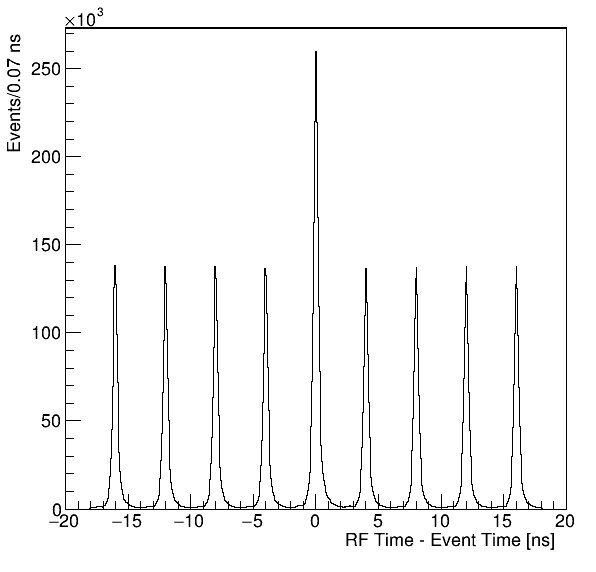

In [41]:
rf_timing_file = ROOT.TFile.Open('/work/halld/home/viducic/scripts/plotting/plot_delta_t.root')
hist_rf_timing = rf_timing_file.Get('RFTime')
hist_rf_timing_cut = rf_timing_file.Get('RFTimeCut')
hist_rf_timing_chi2_cut = rf_timing_file.Get('RFTimeChi2Cut')

hist_rf_timing.SetDirectory(0)
hist_rf_timing_cut.SetDirectory(0)
hist_rf_timing_chi2_cut.SetDirectory(0)

rf_timing_file.Close()

hist_rf_timing.SetLineColor(ROOT.kBlack)
hist_rf_timing_chi2_cut.SetLineColor(ROOT.kBlack)
hist_rf_timing_cut.SetFillColor(ROOT.kGray)
hist_rf_timing_cut.SetLineColor(ROOT.kBlack)

hist_rf_timing.GetYaxis().SetTitle(f'Events/{hist_rf_timing.GetBinWidth(1):0.2f} ns')

c.Clear()
hist_rf_timing.Draw()
# hist_rf_timing_chi2_cut.Draw('same')
# hist_rf_timing_cut.Draw('same')
c.Draw()


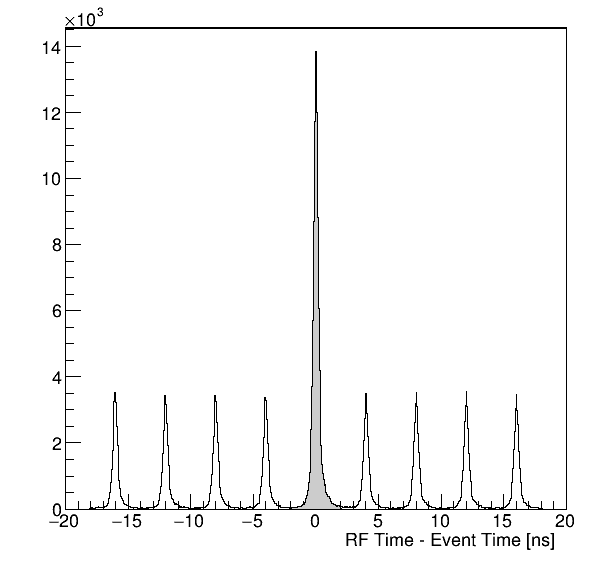

In [42]:
c.Clear()

hist_rf_timing_chi2_cut.Draw()
hist_rf_timing_cut.Draw('same')

c.Draw()

## Phasespace efficiency for $K^*$ Rejection 

In [72]:
# code found at: /work/halld/home/viducic/scripts/crosssection/kstar_rejection_dalitz_efficiency.ipynb

## $f_1$ Resolution Extraction

 FCN=84.1553 FROM MIGRAD    STATUS=CONVERGED     120 CALLS         121 TOTAL
                     EDM=1.14186e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           7.83457e+01   4.99241e-01   2.24949e-03   4.81659e-05
   2  p1           1.28500e+00     fixed    
   3  p2           1.12807e-02   1.95717e-04   8.81901e-07  -2.11358e-01
   4  p3           2.20000e-02     fixed    


Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


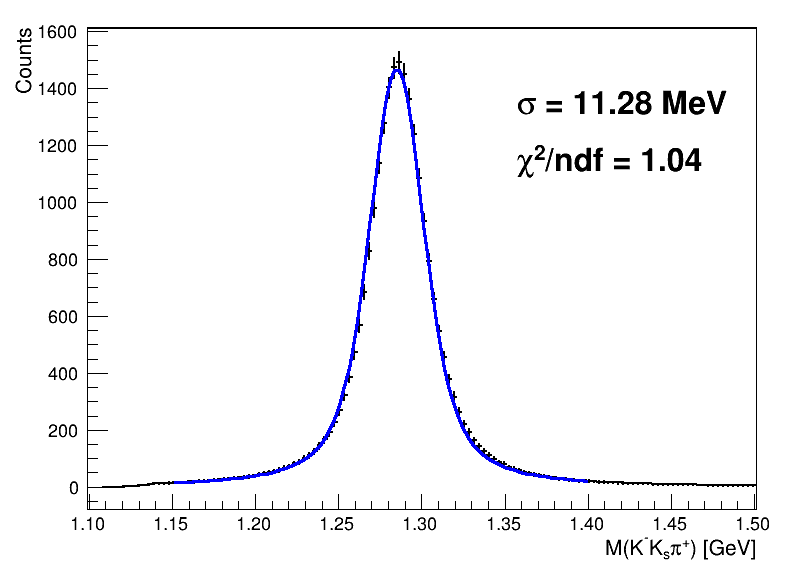

In [82]:
res_signal_mc = tools.get_integrated_gluex1_signal_mc_hist_for_resolution_fitting('pipkmks', scale_factor=50, nbins = 500)
tools.set_sqrtN_error(res_signal_mc)
res_signal_mc.GetXaxis().SetTitle('M(K^{-}K_{s}#pi^{+}) [GeV]')
res_signal_mc.GetYaxis().SetTitle('Counts')
res_signal_mc.GetXaxis().SetRangeUser(1.1, 1.5)

res_func = ROOT.TF1('func', '[0]*TMath::Voigt(x-[1], [2], [3])', 1.15, 1.4)
res_func.FixParameter(1, 1.285)
res_func.FixParameter(3, 0.022)

res_result = res_signal_mc.Fit(res_func, 'SR0')
res_func.SetLineColor(ROOT.kBlue)


chi2_per_ndf = res_func.GetChisquare() / res_func.GetNDF()

c.Clear()
res_signal_mc.Draw()
res_func.Draw('same')

res_fit_latex = ROOT.TLatex()
res_fit_latex.SetTextSize(0.06)
res_fit_latex.DrawLatexNDC(0.65, 0.7, '#chi^{2}/ndf = ' + '{:.2f}'.format(chi2_per_ndf))
res_fit_latex.DrawLatexNDC(0.65, 0.8, '#sigma = ' + '{:.2f}'.format(res_func.GetParameter(2) * 1000) + ' MeV')
c.Draw()


## Selected Binned Fit Examples

In [83]:
print("fuck you idiot.")

fuck you idiot.


## Systematic Variations

In [84]:
sys_hist_filename = '/work/halld/home/viducic/systematic_errors/hists_to_show_variations_{}.root'
variations = ['kinfit_cl', 'pathlength', 'ks_m', 'ppi', 'kp', 'ksp', 'pp', 'neutral_kstar', 'charged_kstar', 'mx2_all']
root_file_pipkmks = ROOT.TFile.Open(sys_hist_filename.format('pipkmks'))
root_file_pimkpks = ROOT.TFile.Open(sys_hist_filename.format('pimkpks'))
sys_hist_dict_pipkmks = {}
sys_hist_dict_pimkpks = {}
for var in variations:
    hist_pipkmks = root_file_pipkmks.Get(var)
    hist_pimkpks = root_file_pimkpks.Get(var)
    hist_pipkmks.SetDirectory(0)
    hist_pipkmks.SetFillColor(ROOT.kGray)
    hist_pimkpks.SetDirectory(0)
    hist_pimkpks.SetFillColor(ROOT.kGray)
    hist_pimkpks.SetLineColor(ROOT.kRed)
    sys_hist_dict_pipkmks[var] = hist_pipkmks
    sys_hist_dict_pimkpks[var] = hist_pimkpks
root_file_pipkmks.Close()
root_file_pimkpks.Close()


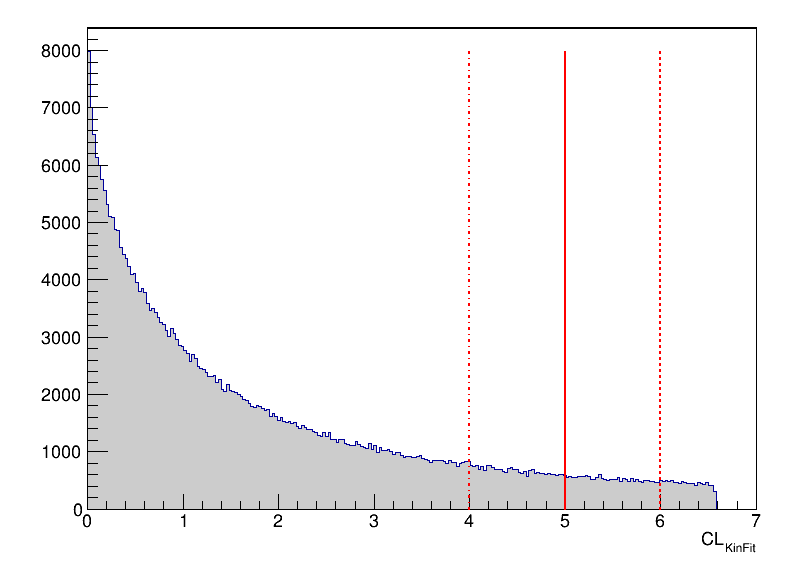

In [85]:
c.Clear()

var_cut = 'kinfit_cl'
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = 5, 6, 4
line_nominal = ROOT.TLine(nominal, sys_hist_dict_pipkmks[var_cut].GetMinimum(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, sys_hist_dict_pipkmks[var_cut].GetMinimum(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, sys_hist_dict_pipkmks[var_cut].GetMinimum(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

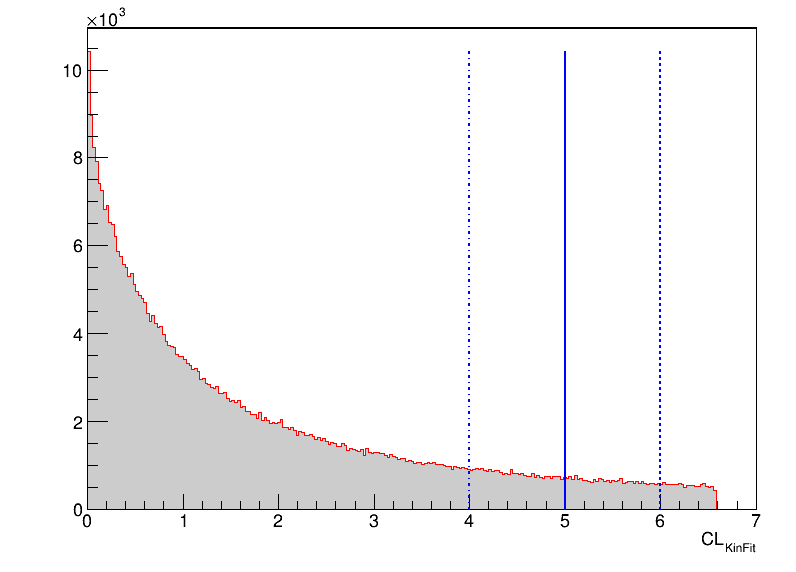

In [86]:
c.Clear()

var_cut = 'kinfit_cl'
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = 5, 6, 4
line_nominal = ROOT.TLine(nominal, sys_hist_dict_pimkpks[var_cut].GetMinimum(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, sys_hist_dict_pimkpks[var_cut].GetMinimum(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, sys_hist_dict_pimkpks[var_cut].GetMinimum(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

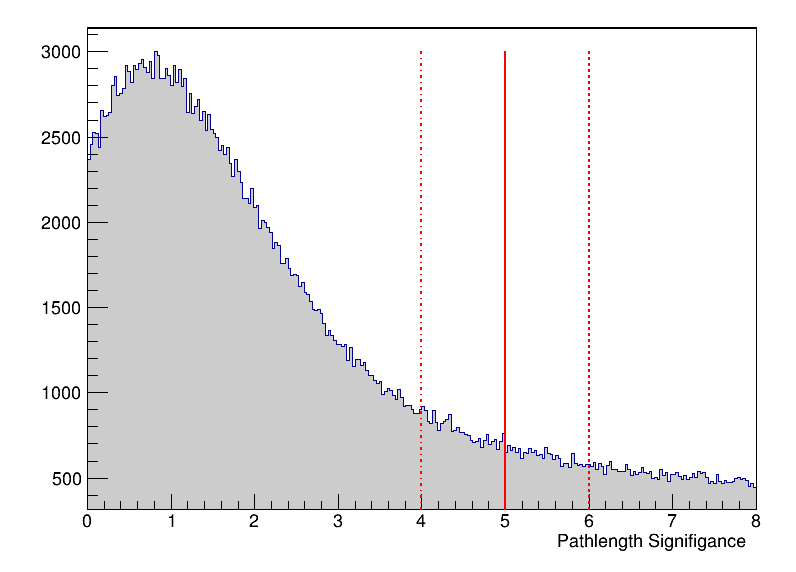

In [87]:
c.Clear()

var_cut = 'pathlength'
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = 5, 6, 4
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

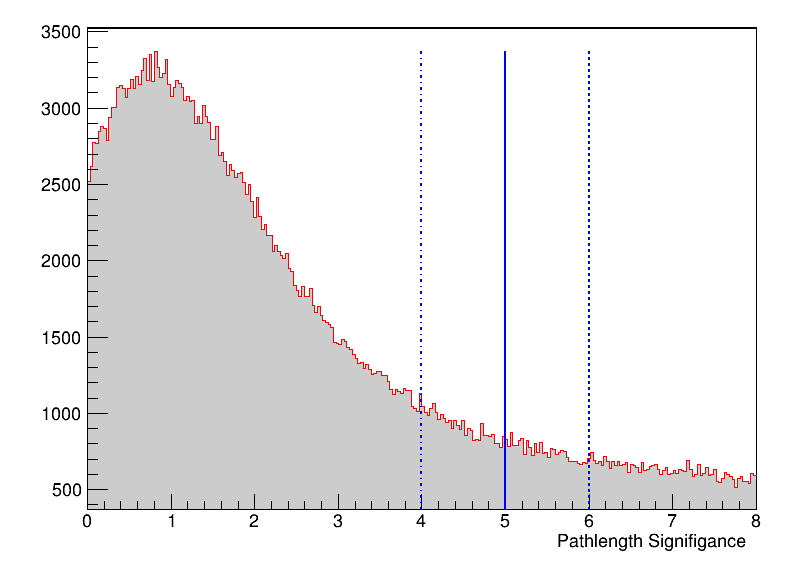

In [88]:
c.Clear()

var_cut = 'pathlength'
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = 5, 6, 4
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

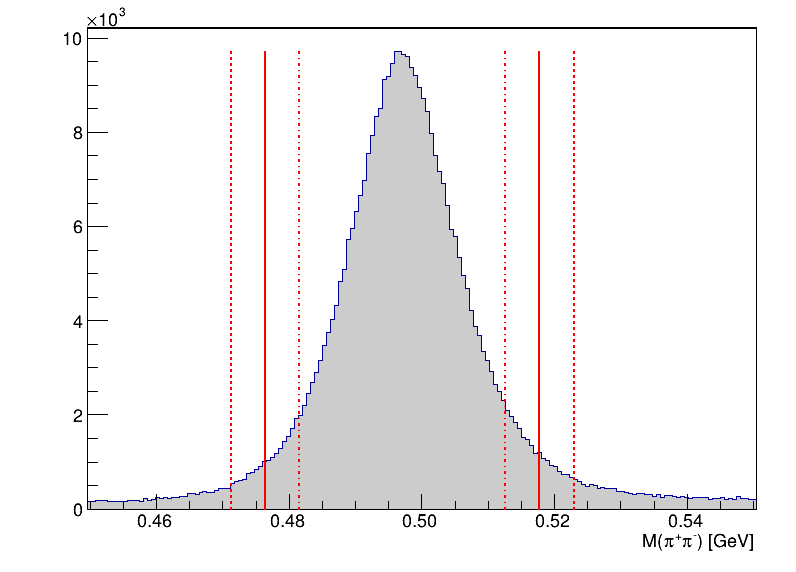

In [89]:
c.Clear()

var_cut = 'ks_m'
sys_hist_dict_pipkmks[var_cut].GetXaxis().SetRangeUser(0.45, 0.55)
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = constants.KSHORT_FIT_MEAN + 2*constants.KSHORT_FIT_WIDTH, constants.KSHORT_FIT_MEAN + 2.5*constants.KSHORT_FIT_WIDTH, constants.KSHORT_FIT_MEAN + 1.5*constants.KSHORT_FIT_WIDTH
nominal_left, loose_left, tight_left = constants.KSHORT_FIT_MEAN - 2*constants.KSHORT_FIT_WIDTH, constants.KSHORT_FIT_MEAN - 2.5*constants.KSHORT_FIT_WIDTH, constants.KSHORT_FIT_MEAN - 1.5*constants.KSHORT_FIT_WIDTH
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_nominal_left = ROOT.TLine(nominal_left, ROOT.gPad.GetUymin(), nominal_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal_left.SetLineColor(ROOT.kRed)
line_nominal_left.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_loose_left = ROOT.TLine(loose_left, ROOT.gPad.GetUymin(), loose_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose_left.SetLineStyle(2)
line_loose_left.SetLineColor(ROOT.kRed)
line_loose_left.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_tight_left = ROOT.TLine(tight_left, ROOT.gPad.GetUymin(), tight_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight_left.SetLineStyle(4)
line_tight_left.SetLineColor(ROOT.kRed)
line_tight_left.SetLineWidth(2)
line_nominal.Draw()
line_nominal_left.Draw()
line_loose.Draw()
line_loose_left.Draw()
line_tight.Draw()
line_tight_left.Draw()
c.Update()
c.Draw()

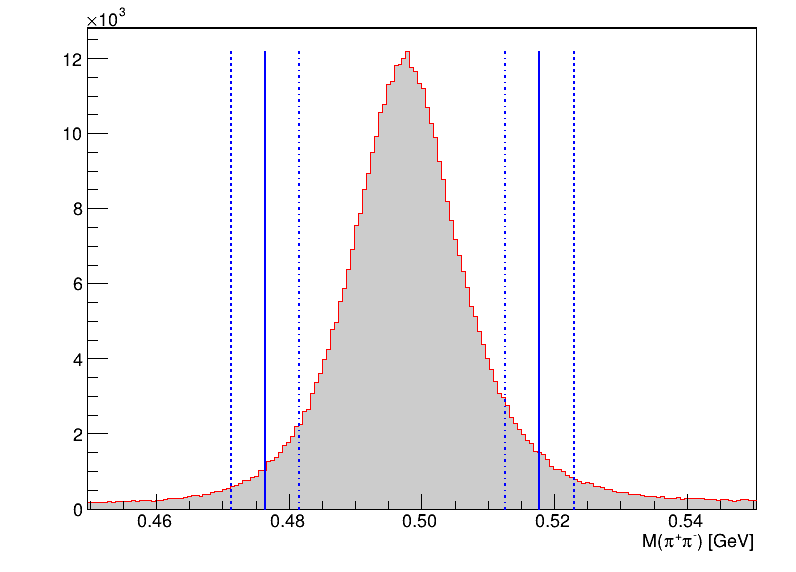

In [90]:
var_cut = 'ks_m'
sys_hist_dict_pimkpks[var_cut].GetXaxis().SetRangeUser(0.45, 0.55)
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = constants.KSHORT_FIT_MEAN + 2*constants.KSHORT_FIT_WIDTH, constants.KSHORT_FIT_MEAN + 2.5*constants.KSHORT_FIT_WIDTH, constants.KSHORT_FIT_MEAN + 1.5*constants.KSHORT_FIT_WIDTH
nominal_left, loose_left, tight_left = constants.KSHORT_FIT_MEAN - 2*constants.KSHORT_FIT_WIDTH, constants.KSHORT_FIT_MEAN - 2.5*constants.KSHORT_FIT_WIDTH, constants.KSHORT_FIT_MEAN - 1.5*constants.KSHORT_FIT_WIDTH
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_nominal_left = ROOT.TLine(nominal_left, ROOT.gPad.GetUymin(), nominal_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal_left.SetLineColor(ROOT.kBlue)
line_nominal_left.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_loose_left = ROOT.TLine(loose_left, ROOT.gPad.GetUymin(), loose_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose_left.SetLineStyle(2)
line_loose_left.SetLineColor(ROOT.kBlue)
line_loose_left.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_tight_left = ROOT.TLine(tight_left, ROOT.gPad.GetUymin(), tight_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight_left.SetLineStyle(4)
line_tight_left.SetLineColor(ROOT.kBlue)
line_tight_left.SetLineWidth(2)
line_nominal.Draw()
line_nominal_left.Draw()
line_loose.Draw()
line_loose_left.Draw()
line_tight.Draw()
line_tight_left.Draw()
c.Update()
c.Draw()

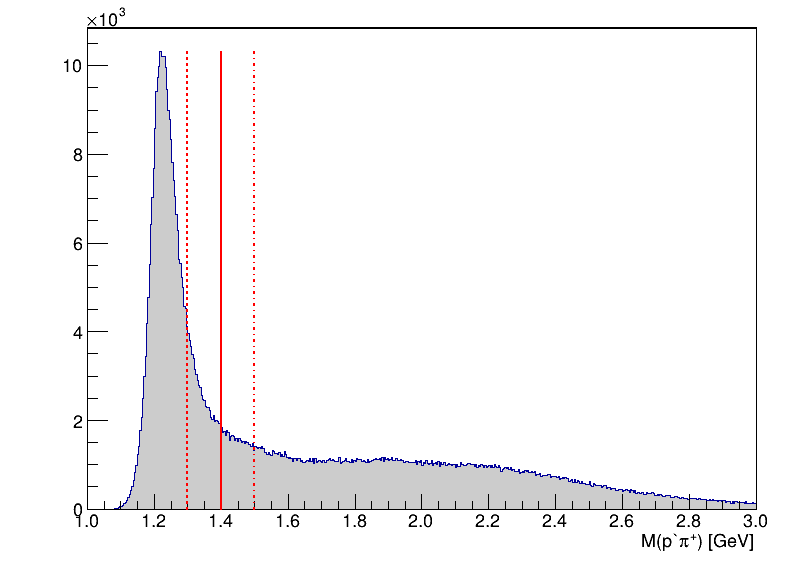

In [91]:
c.Clear()

var_cut = 'ppi'
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = 1.4, 1.3, 1.5
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

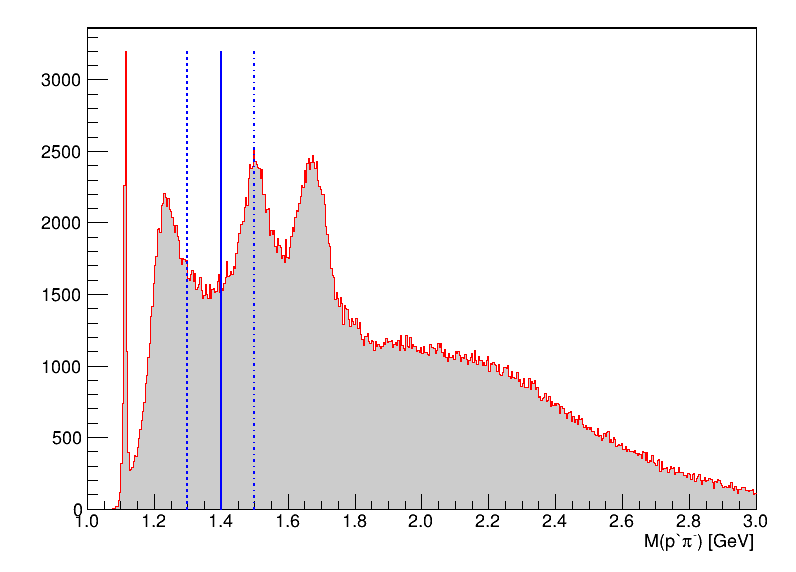

In [92]:
c.Clear()

var_cut = 'ppi'
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = 1.4, 1.3, 1.5
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

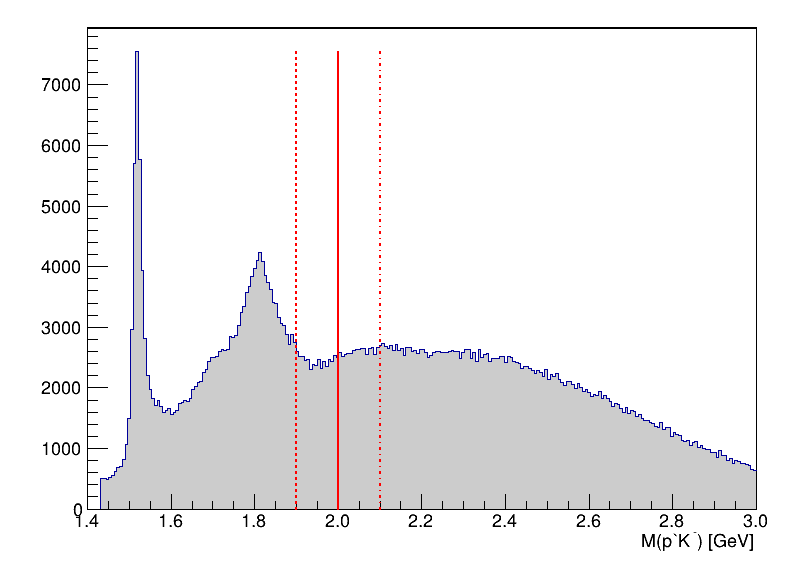

In [93]:
c.Clear()

var_cut = 'kp'
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = 2.0, 1.9, 2.1
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

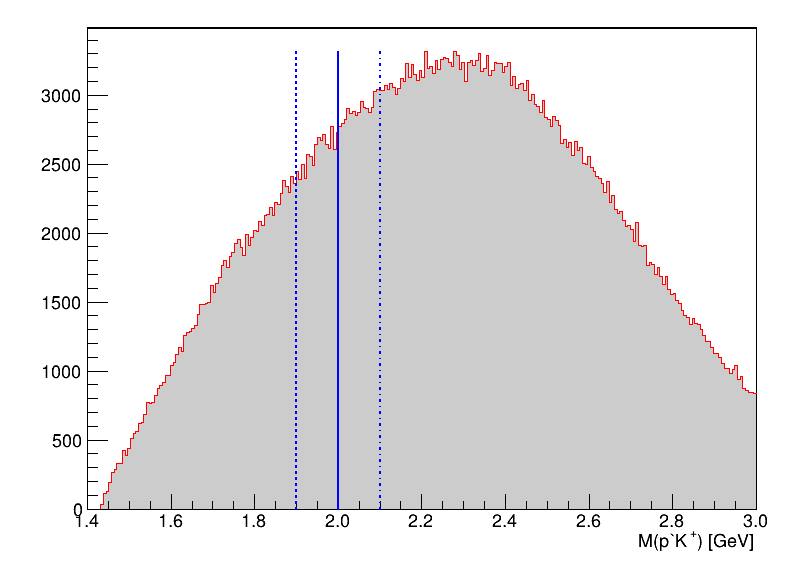

In [94]:
c.Clear()

var_cut = 'kp'
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = 2.0, 1.9, 2.1
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

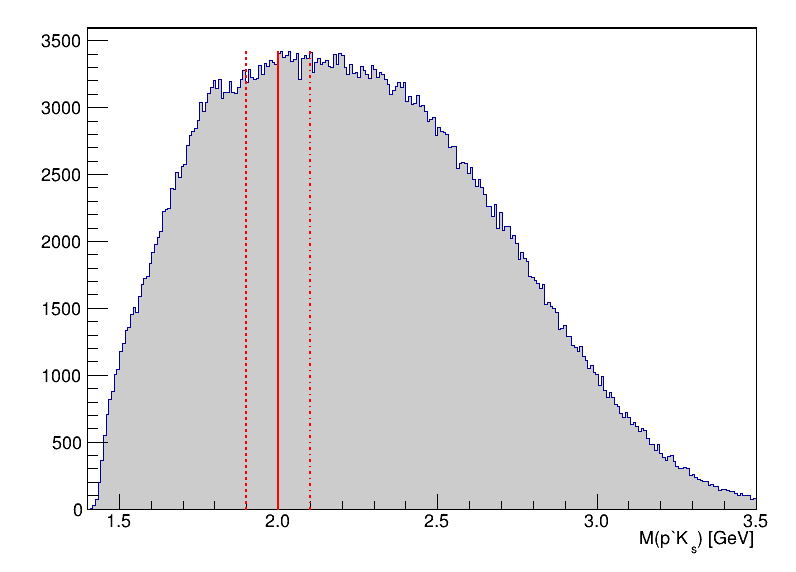

In [95]:
c.Clear()

var_cut = 'ksp'
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = 2.0, 1.9, 2.1
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

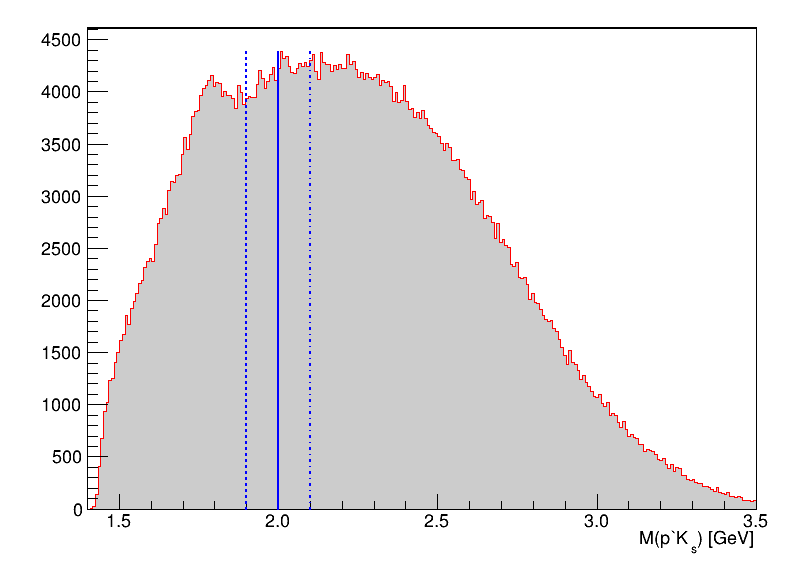

In [96]:
c.Clear()

var_cut = 'ksp'
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = 2.0, 1.9, 2.1
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

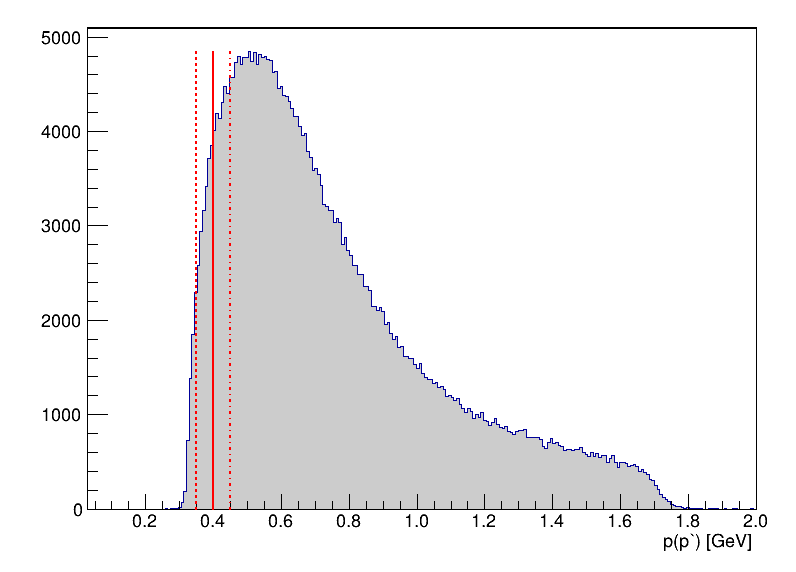

In [97]:
c.Clear()

var_cut = 'pp'
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = 0.4, 0.35, 0.45
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

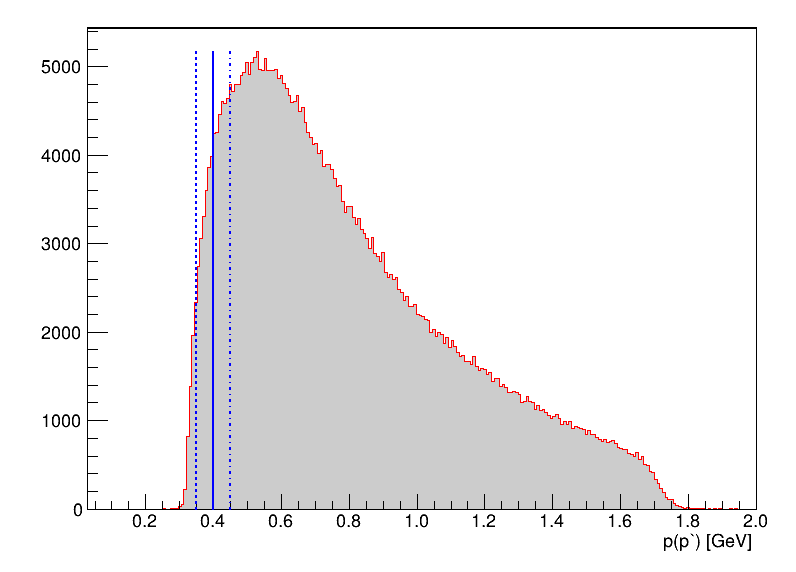

In [98]:
c.Clear()

var_cut = 'pp'
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = 0.4, 0.35, 0.45
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

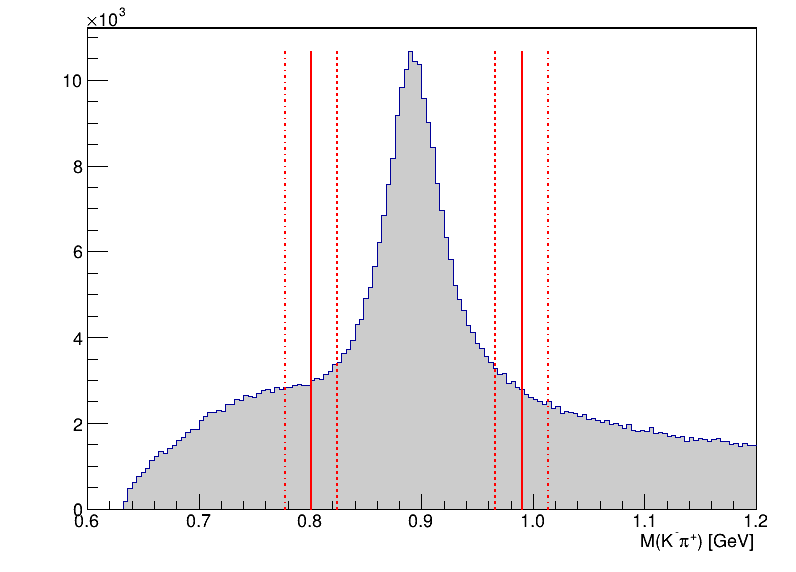

In [99]:
c.Clear()

var_cut = 'neutral_kstar'
# sys_hist_dict_pipkmks[var_cut].GetXaxis().SetRangeUser(0.45, 0.55)
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = cuts.NEUTRAL_KSTAR_MASS + 2*cuts.NEUTRAL_KSTAR_WIDTH, cuts.NEUTRAL_KSTAR_MASS + 1.5*cuts.NEUTRAL_KSTAR_WIDTH, cuts.NEUTRAL_KSTAR_MASS + 2.5*cuts.NEUTRAL_KSTAR_WIDTH
nominal_left, loose_left, tight_left = cuts.NEUTRAL_KSTAR_MASS - 2*cuts.NEUTRAL_KSTAR_WIDTH, cuts.NEUTRAL_KSTAR_MASS - 1.5*cuts.NEUTRAL_KSTAR_WIDTH, cuts.NEUTRAL_KSTAR_MASS - 2.5*cuts.NEUTRAL_KSTAR_WIDTH
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_nominal_left = ROOT.TLine(nominal_left, ROOT.gPad.GetUymin(), nominal_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal_left.SetLineColor(ROOT.kRed)
line_nominal_left.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_loose_left = ROOT.TLine(loose_left, ROOT.gPad.GetUymin(), loose_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose_left.SetLineStyle(2)
line_loose_left.SetLineColor(ROOT.kRed)
line_loose_left.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_tight_left = ROOT.TLine(tight_left, ROOT.gPad.GetUymin(), tight_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight_left.SetLineStyle(4)
line_tight_left.SetLineColor(ROOT.kRed)
line_tight_left.SetLineWidth(2)
line_nominal.Draw()
line_nominal_left.Draw()
line_loose.Draw()
line_loose_left.Draw()
line_tight.Draw()
line_tight_left.Draw()
c.Update()
c.Draw()

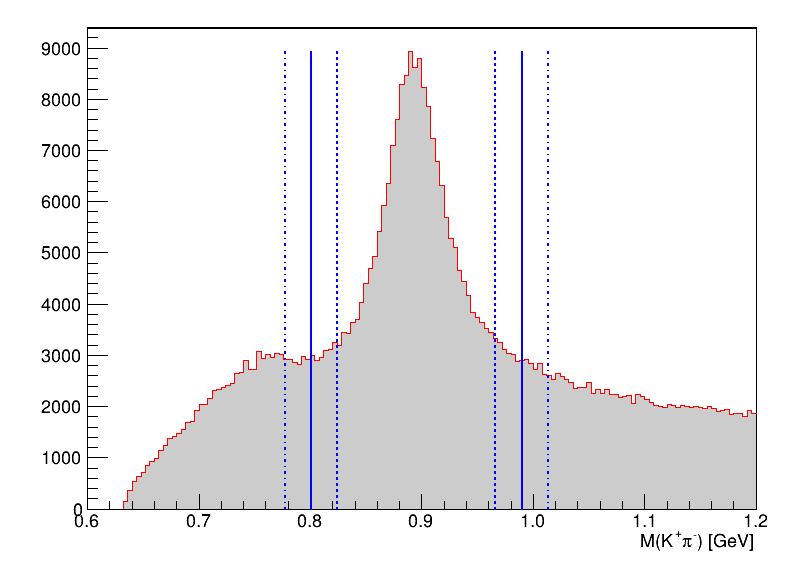

In [100]:
c.Clear()

var_cut = 'neutral_kstar'
# sys_hist_dict_pimkpks[var_cut].GetXaxis().SetRangeUser(0.45, 0.55)
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = cuts.NEUTRAL_KSTAR_MASS + 2*cuts.NEUTRAL_KSTAR_WIDTH, cuts.NEUTRAL_KSTAR_MASS + 1.5*cuts.NEUTRAL_KSTAR_WIDTH, cuts.NEUTRAL_KSTAR_MASS + 2.5*cuts.NEUTRAL_KSTAR_WIDTH
nominal_left, loose_left, tight_left = cuts.NEUTRAL_KSTAR_MASS - 2*cuts.NEUTRAL_KSTAR_WIDTH, cuts.NEUTRAL_KSTAR_MASS - 1.5*cuts.NEUTRAL_KSTAR_WIDTH, cuts.NEUTRAL_KSTAR_MASS - 2.5*cuts.NEUTRAL_KSTAR_WIDTH
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_nominal_left = ROOT.TLine(nominal_left, ROOT.gPad.GetUymin(), nominal_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal_left.SetLineColor(ROOT.kBlue)
line_nominal_left.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_loose_left = ROOT.TLine(loose_left, ROOT.gPad.GetUymin(), loose_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose_left.SetLineStyle(2)
line_loose_left.SetLineColor(ROOT.kBlue)
line_loose_left.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_tight_left = ROOT.TLine(tight_left, ROOT.gPad.GetUymin(), tight_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight_left.SetLineStyle(4)
line_tight_left.SetLineColor(ROOT.kBlue)
line_tight_left.SetLineWidth(2)
line_nominal.Draw()
line_nominal_left.Draw()
line_loose.Draw()
line_loose_left.Draw()
line_tight.Draw()
line_tight_left.Draw()
c.Update()
c.Draw()

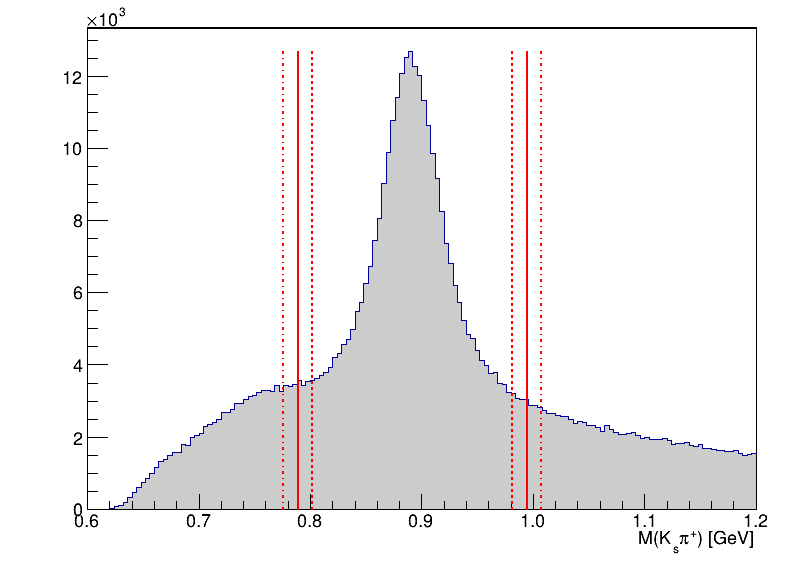

In [101]:
c.Clear()

var_cut = 'charged_kstar'
# sys_hist_dict_pipkmks[var_cut].GetXaxis().SetRangeUser(0.45, 0.55)
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = cuts.CHARGED_KSTAR_MASS + 2*cuts.CHARGED_KSTAR_WIDTH, cuts.CHARGED_KSTAR_MASS + 1.75*cuts.CHARGED_KSTAR_WIDTH, cuts.CHARGED_KSTAR_MASS + 2.25*cuts.CHARGED_KSTAR_WIDTH
nominal_left, loose_left, tight_left = cuts.CHARGED_KSTAR_MASS - 2*cuts.CHARGED_KSTAR_WIDTH, cuts.CHARGED_KSTAR_MASS - 1.75*cuts.CHARGED_KSTAR_WIDTH, cuts.CHARGED_KSTAR_MASS - 2.25*cuts.CHARGED_KSTAR_WIDTH
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_nominal_left = ROOT.TLine(nominal_left, ROOT.gPad.GetUymin(), nominal_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal_left.SetLineColor(ROOT.kRed)
line_nominal_left.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_loose_left = ROOT.TLine(loose_left, ROOT.gPad.GetUymin(), loose_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose_left.SetLineStyle(2)
line_loose_left.SetLineColor(ROOT.kRed)
line_loose_left.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_tight_left = ROOT.TLine(tight_left, ROOT.gPad.GetUymin(), tight_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight_left.SetLineStyle(4)
line_tight_left.SetLineColor(ROOT.kRed)
line_tight_left.SetLineWidth(2)
line_nominal.Draw()
line_nominal_left.Draw()
line_loose.Draw()
line_loose_left.Draw()
line_tight.Draw()
line_tight_left.Draw()
c.Update()
c.Draw()

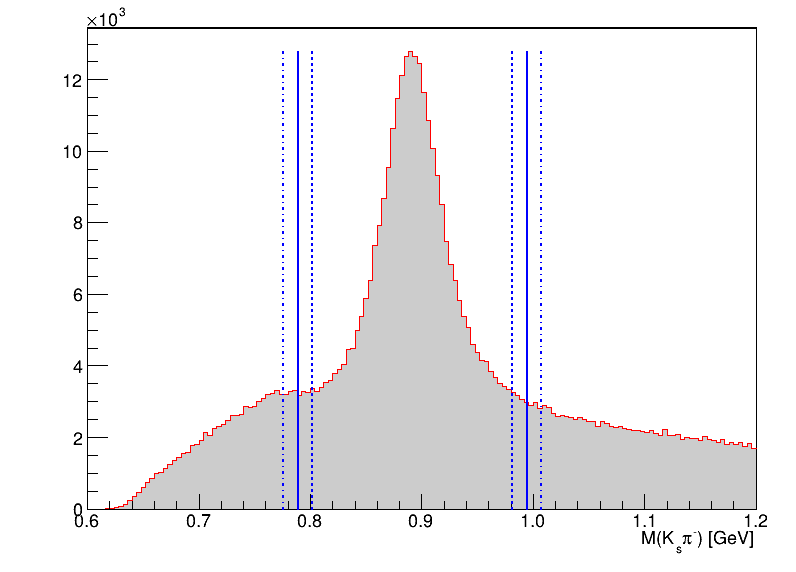

In [102]:
c.Clear()

var_cut = 'charged_kstar'
# sys_hist_dict_pimkpks[var_cut].GetXaxis().SetRangeUser(0.45, 0.55)
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = cuts.CHARGED_KSTAR_MASS + 2*cuts.CHARGED_KSTAR_WIDTH, cuts.CHARGED_KSTAR_MASS + 1.75*cuts.CHARGED_KSTAR_WIDTH, cuts.CHARGED_KSTAR_MASS + 2.25*cuts.CHARGED_KSTAR_WIDTH
nominal_left, loose_left, tight_left = cuts.CHARGED_KSTAR_MASS - 2*cuts.CHARGED_KSTAR_WIDTH, cuts.CHARGED_KSTAR_MASS - 1.75*cuts.CHARGED_KSTAR_WIDTH, cuts.CHARGED_KSTAR_MASS - 2.25*cuts.CHARGED_KSTAR_WIDTH
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_nominal_left = ROOT.TLine(nominal_left, ROOT.gPad.GetUymin(), nominal_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal_left.SetLineColor(ROOT.kBlue)
line_nominal_left.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_loose_left = ROOT.TLine(loose_left, ROOT.gPad.GetUymin(), loose_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose_left.SetLineStyle(2)
line_loose_left.SetLineColor(ROOT.kBlue)
line_loose_left.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_tight_left = ROOT.TLine(tight_left, ROOT.gPad.GetUymin(), tight_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight_left.SetLineStyle(4)
line_tight_left.SetLineColor(ROOT.kBlue)
line_tight_left.SetLineWidth(2)
line_nominal.Draw()
line_nominal_left.Draw()
line_loose.Draw()
line_loose_left.Draw()
line_tight.Draw()
line_tight_left.Draw()
c.Update()
c.Draw()

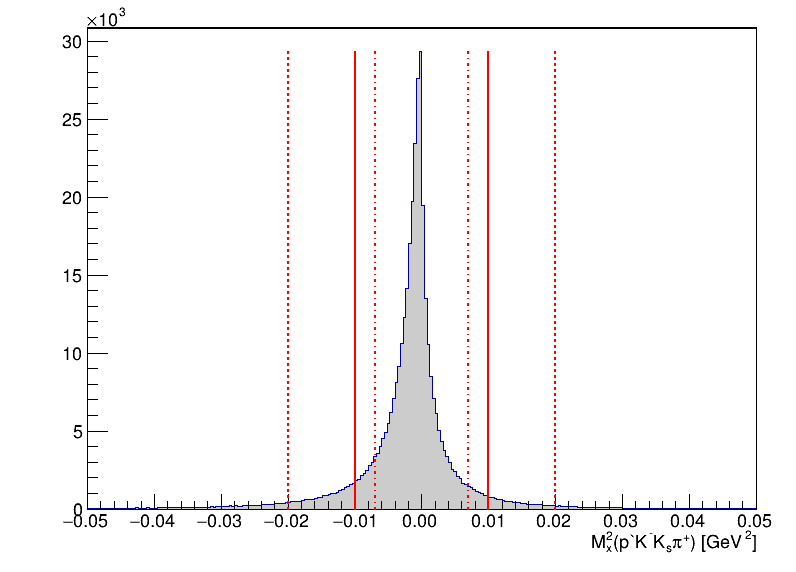

In [103]:
c.Clear()

var_cut = 'mx2_all'
# sys_hist_dict_pipkmks[var_cut].GetXaxis().SetRangeUser(0.45, 0.55)
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = 0.01, 0.02, 0.007
nominal_left, loose_left, tight_left = -0.01, -0.02, -0.007
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_nominal_left = ROOT.TLine(nominal_left, ROOT.gPad.GetUymin(), nominal_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal_left.SetLineColor(ROOT.kRed)
line_nominal_left.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_loose_left = ROOT.TLine(loose_left, ROOT.gPad.GetUymin(), loose_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose_left.SetLineStyle(2)
line_loose_left.SetLineColor(ROOT.kRed)
line_loose_left.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_tight_left = ROOT.TLine(tight_left, ROOT.gPad.GetUymin(), tight_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight_left.SetLineStyle(4)
line_tight_left.SetLineColor(ROOT.kRed)
line_tight_left.SetLineWidth(2)
line_nominal.Draw()
line_nominal_left.Draw()
line_loose.Draw()
line_loose_left.Draw()
line_tight.Draw()
line_tight_left.Draw()
c.Update()
c.Draw()

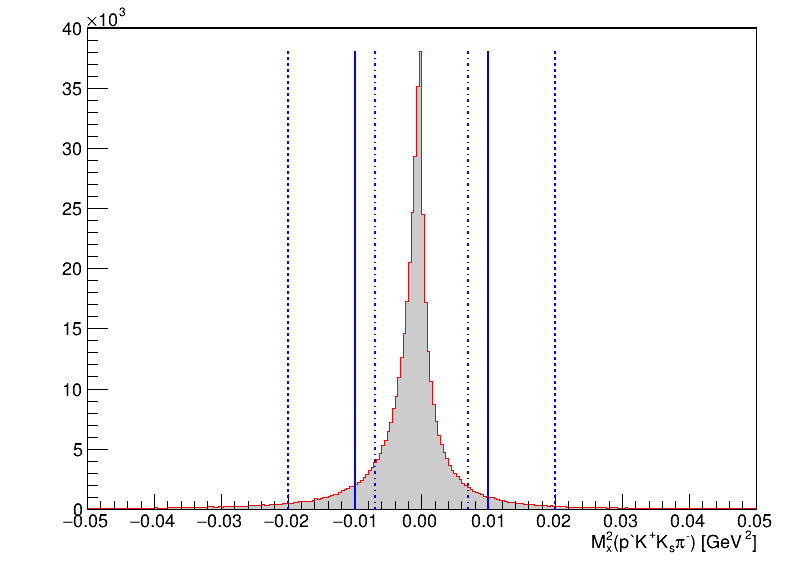

In [104]:
c.Clear()

var_cut = 'mx2_all'
# sys_hist_dict_pimkpks[var_cut].GetXaxis().SetRangeUser(0.45, 0.55)
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = 0.01, 0.02, 0.007
nominal_left, loose_left, tight_left = -0.01, -0.02, -0.007
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_nominal_left = ROOT.TLine(nominal_left, ROOT.gPad.GetUymin(), nominal_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal_left.SetLineColor(ROOT.kBlue)
line_nominal_left.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_loose_left = ROOT.TLine(loose_left, ROOT.gPad.GetUymin(), loose_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose_left.SetLineStyle(2)
line_loose_left.SetLineColor(ROOT.kBlue)
line_loose_left.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_tight_left = ROOT.TLine(tight_left, ROOT.gPad.GetUymin(), tight_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight_left.SetLineStyle(4)
line_tight_left.SetLineColor(ROOT.kBlue)
line_tight_left.SetLineWidth(2)
line_nominal.Draw()
line_nominal_left.Draw()
line_loose.Draw()
line_loose_left.Draw()
line_tight.Draw()
line_tight_left.Draw()
c.Update()
c.Draw()

## Sample Binned Fits

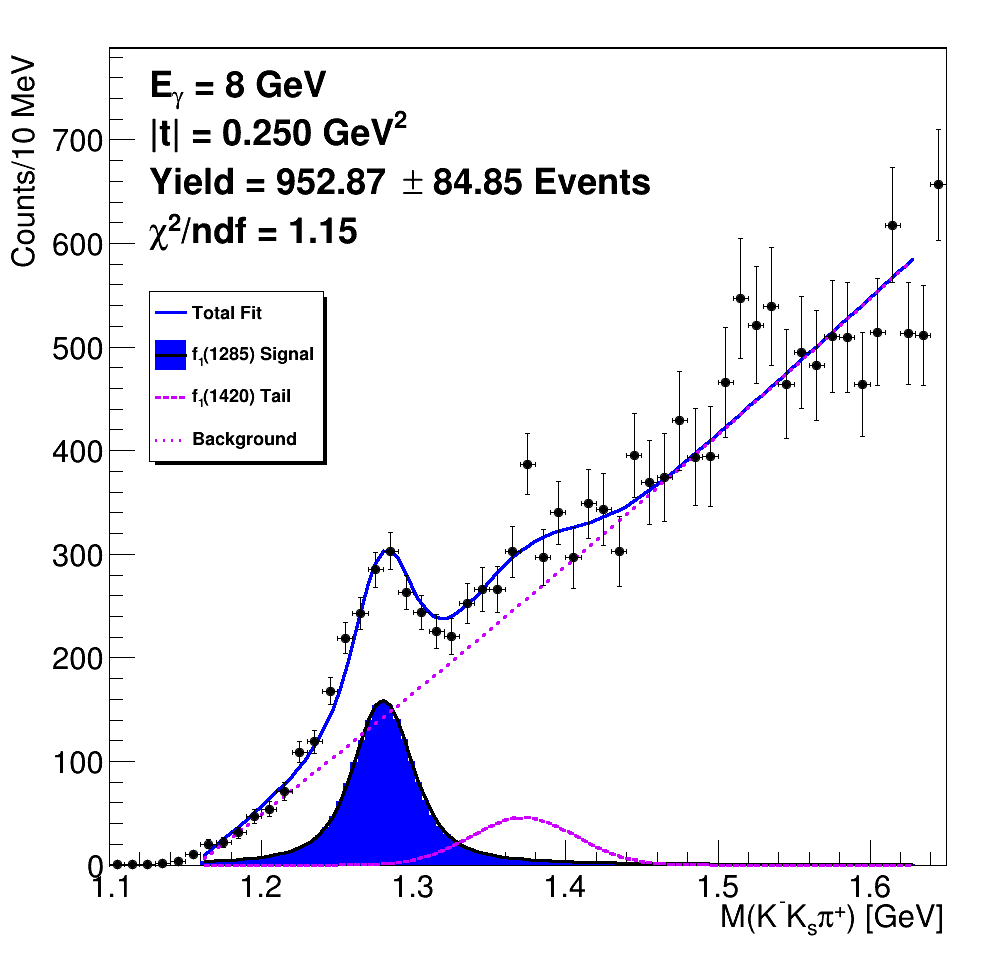

In [105]:
from IPython.display import Image, display

# Define the path to the image file
image_path = '/work/halld/home/viducic/scripts/crosssection/plots/pol2_gaus_pipkmks_e8_t2_fit.png'

# Create an instance of the image using the Image class
image = Image(filename=image_path)

# Display the image
display(image)

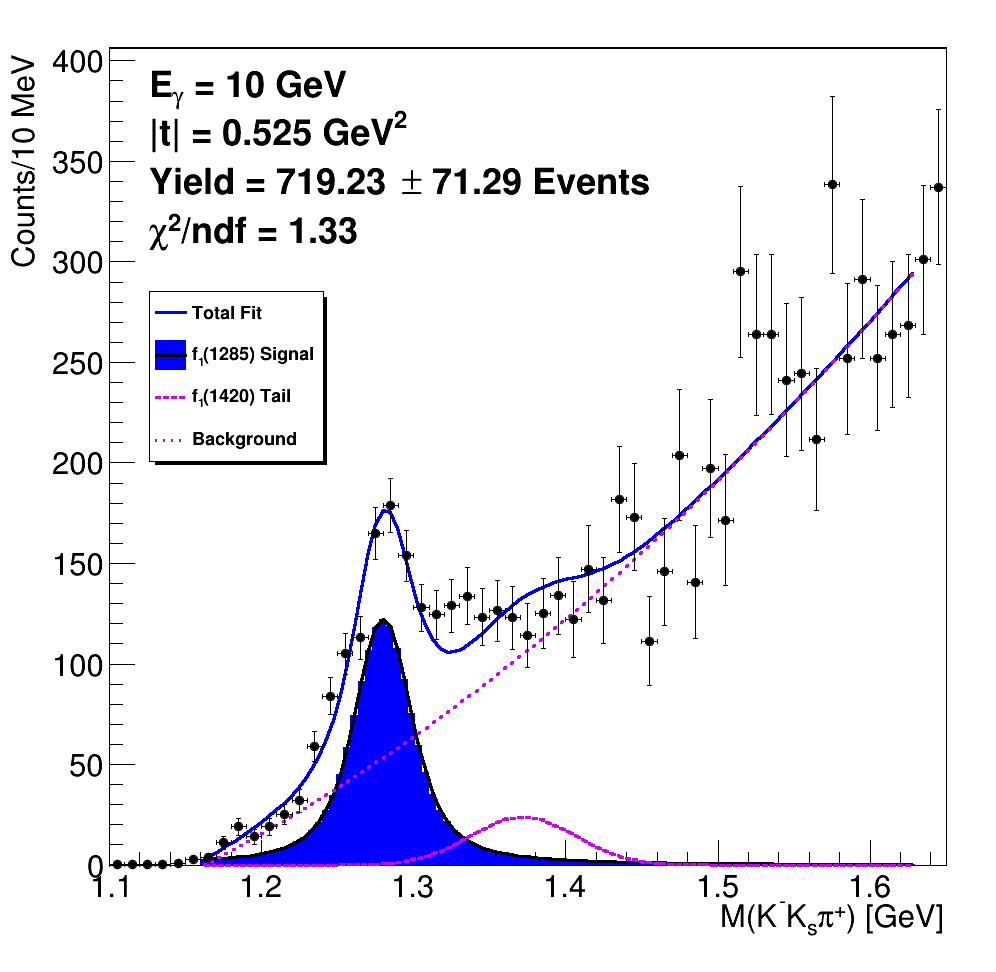

In [106]:
image_path = '/work/halld/home/viducic/scripts/crosssection/plots/pol2_gaus_pipkmks_e10_t4_fit.png'
image = Image(filename=image_path)
display(image)

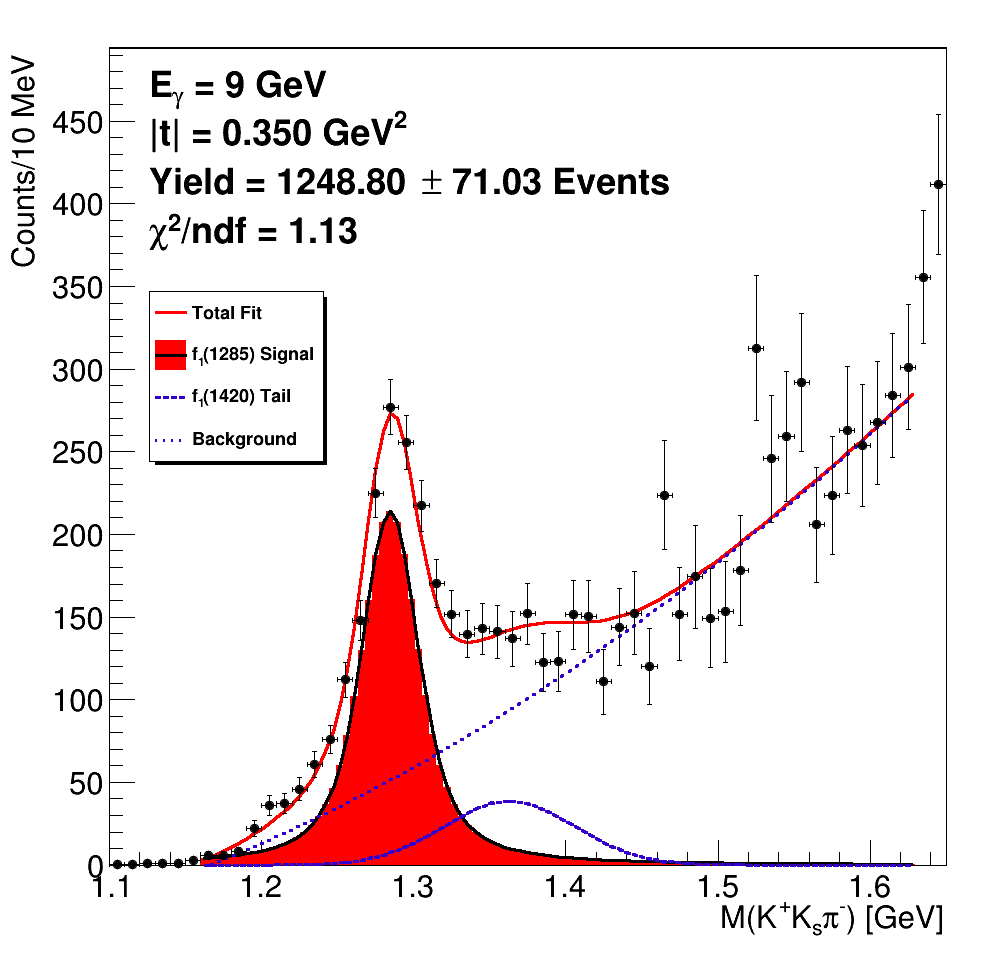

In [107]:
image_path = '/work/halld/home/viducic/scripts/crosssection/plots/pol2_gaus_pimkpks_e9_t3_fit.png'
image = Image(filename=image_path)
display(image)

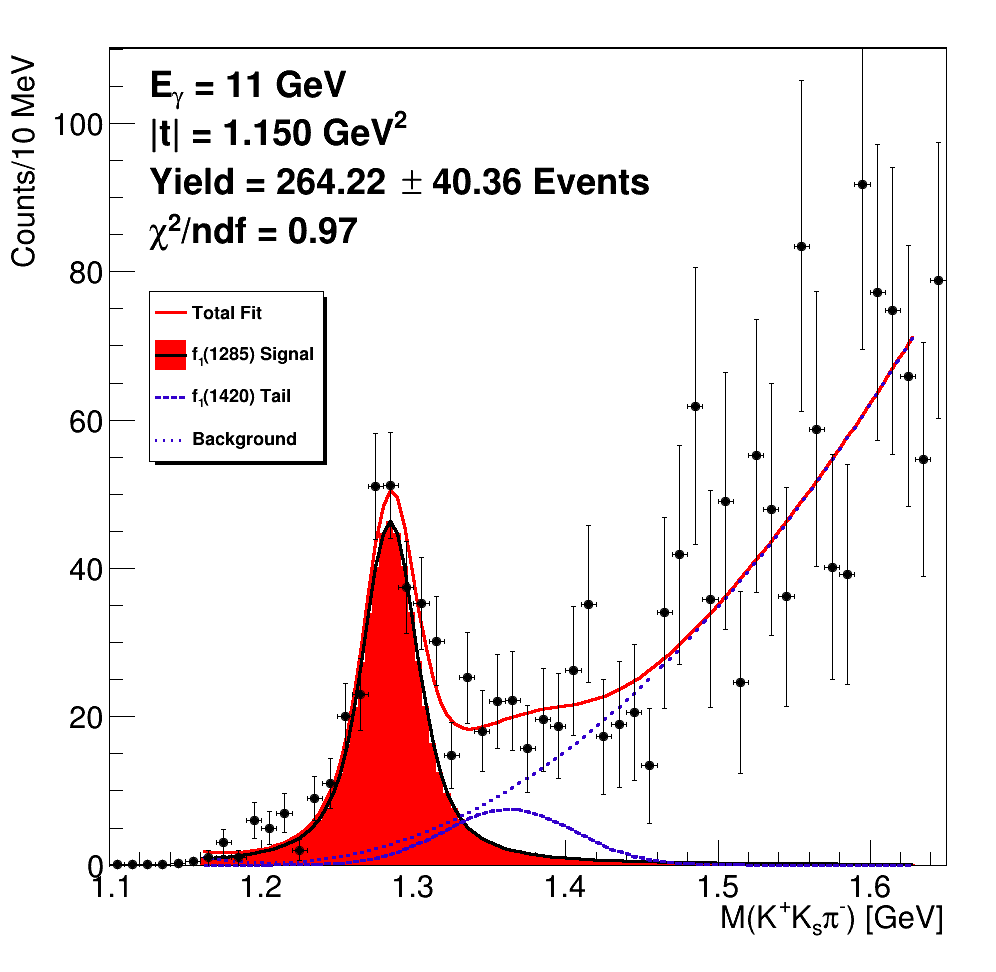

In [108]:
image_path = '/work/halld/home/viducic/scripts/crosssection/plots/pol2_gaus_pimkpks_e11_t6_fit.png'
image = Image(filename=image_path)
display(image)

## Cross Section Plot with Stat Errors Only

In [109]:
gluex_markers = {
    8: ROOT.kFullCircle,
    9: ROOT.kFullSquare,
    10: ROOT.kFullTriangleUp,
    11: ROOT.kFullDiamond
}

pipkmks_colors = {
    8: ROOT.kBlue,
    9: ROOT.kBlue+1,
    10: ROOT.kBlue+2,
    11: ROOT.kBlue+3
}

pimkpks_colors = {
    8: ROOT.kRed,
    9: ROOT.kRed+1,
    10: ROOT.kRed+2,
    11: ROOT.kRed+3
}

df_cs_results_stat_err_pipkmks = pd.read_csv('/work/halld/home/viducic/data/fit_params/pipkmks/tf1_gaus_cross_section_values.csv')
df_cs_results_stat_err_pimkpks = pd.read_csv('/work/halld/home/viducic/data/fit_params/pimkpks/tf1_gaus_cross_section_values.csv')

cs_stat_grouped_pipkmks = df_cs_results_stat_err_pipkmks.groupby('beam_energy')
cs_stat_grouped_pimkpks = df_cs_results_stat_err_pimkpks.groupby('beam_energy')


In [110]:
cs_stat_err_pipkmks_graphs = []
cs_stat_err_pimkpks_graphs = []
for beam_energy, group in cs_stat_grouped_pipkmks:
    group_pim = cs_stat_grouped_pimkpks.get_group(beam_energy)
    graph_pip = ROOT.TGraphErrors(len(group.t_bin_middle.to_numpy()), group.t_bin_middle.to_numpy(dtype='d'), group.cross_section.to_numpy(), group.t_bin_width.to_numpy(), group.cross_section_error.to_numpy())
    graph_pim = ROOT.TGraphErrors(len(group_pim.t_bin_middle.to_numpy()), group_pim.t_bin_middle.to_numpy(dtype='d'), group_pim.cross_section.to_numpy(), group_pim.t_bin_width.to_numpy(), group_pim.cross_section_error.to_numpy())
    graph_pip.SetName(f'pipkmks_{beam_energy}')
    graph_pim.SetName(f'pimkpks_{beam_energy}')
    graph_pip.SetMarkerColor(pipkmks_colors[beam_energy])
    graph_pim.SetMarkerColor(pimkpks_colors[beam_energy])
    graph_pip.SetMarkerStyle(gluex_markers[beam_energy])
    graph_pim.SetMarkerStyle(gluex_markers[beam_energy])
    graph_pip.SetLineColor(pipkmks_colors[beam_energy])
    graph_pim.SetLineColor(pimkpks_colors[beam_energy])
    graph_pip.SetLineWidth(2)
    graph_pim.SetLineWidth(2)
    graph_pip.GetXaxis().SetTitle('-t [GeV^{2}]')
    graph_pim.GetXaxis().SetTitle('-t [GeV^{2}]')
    graph_pip.GetYaxis().SetTitle('#frac{d#sigma}{dt} [nb/GeV^{2}]')
    graph_pim.GetYaxis().SetTitle('#frac{d#sigma}{dt} [nb/GeV^{2}]')
    graph_pip.SetTitle(' E_{#gamma} = ' + str(beam_energy) + ' GeV')
    graph_pim.SetTitle(' E_{#gamma} = ' + str(beam_energy) + ' GeV')
    cs_stat_err_pipkmks_graphs.append(graph_pip)
    cs_stat_err_pimkpks_graphs.append(graph_pim)

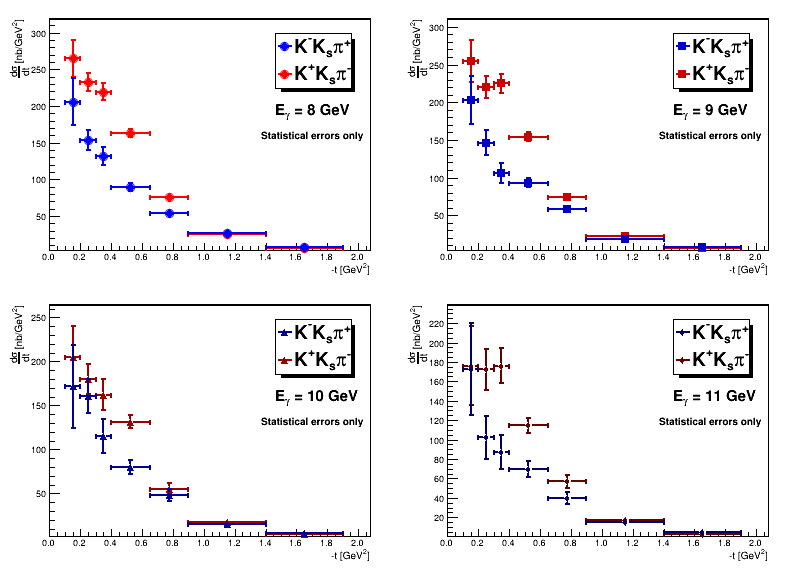

In [111]:
c.Clear()
c.Divide(2,2)

all_four_energies_legends = []

stat_err_notice = ROOT.TPaveText(0.7, 0.5, 0.9, 0.55, "brNDC")
stat_err_notice.SetFillColorAlpha(0, 0)
stat_err_notice.SetBorderSize(0)
stat_err_notice.SetTextSize(0.04)
stat_err_notice.SetTextAlign(22)
stat_err_notice.AddText('Statistical errors only')
notices = [stat_err_notice]


for i in range(4):
    legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
    legend.AddEntry(cs_stat_err_pipkmks_graphs[i], 'K^{-}K_{s}#pi^{+}', 'lpf')
    legend.AddEntry(cs_stat_err_pimkpks_graphs[i], 'K^{+}K_{s}#pi^{-}', 'lpf')
    all_four_energies_legends.append(legend)

    c.cd(i+1)
    cs_stat_err_pimkpks_graphs[i].Draw('AP')
    cs_stat_err_pipkmks_graphs[i].Draw('P')
    all_four_energies_legends[i].Draw()

    cs_stat_err_latex = ROOT.TLatex()
    cs_stat_err_latex.SetTextSize(0.06)
    cs_stat_err_latex.DrawLatexNDC(0.7, 0.6, 'E_{#gamma} = ' + str(i+8) + ' GeV')
    
    notices[0].Draw()


c.Draw()

## Barlow Plots for Systematic Variations in ROOT

In [112]:
# barlow_df = ROOT.RDF.MakeCsvDataFrame('/work/halld/home/viducic/systematic_errors/barlow_results_signifigant_cuts.csv')
barlow_df = ROOT.RDF.MakeCsvDataFrame('/work/halld/home/viducic/systematic_errors/barlow_results.csv')
graphs_pipkmks = []
graphs_pimkpks = []
nop_variations = ['kinfit_cl', 'pathlength', 'ks_m', 'ppi', 'kp', 'ksp', 'neutral_kstar', 'charged_kstar', 'mx2_all']
for var in nop_variations:
    # I know this is bad code but I don't have the time. 
    graph_pipkmks_8 = barlow_df.Filter('channel == "pipkmks"').Filter(f'e == 8').Filter(f'cut == "{var}"').Graph('t', 'sigma_barlow')
    graph_pipkmks_9 = barlow_df.Filter('channel == "pipkmks"').Filter(f'e == 9').Filter(f'cut == "{var}"').Graph('t', 'sigma_barlow')
    graph_pipkmks_10 = barlow_df.Filter('channel == "pipkmks"').Filter(f'e == 10').Filter(f'cut == "{var}"').Graph('t', 'sigma_barlow')
    graph_pipkmks_11 = barlow_df.Filter('channel == "pipkmks"').Filter(f'e == 11').Filter(f'cut == "{var}"').Graph('t', 'sigma_barlow')
    graphs_pipkmks.append((graph_pipkmks_8, graph_pipkmks_9, graph_pipkmks_10, graph_pipkmks_11))

    graph_pimkpks_8 = barlow_df.Filter('channel == "pimkpks"').Filter(f'e == 8').Filter(f'cut == "{var}"').Graph('t', 'sigma_barlow')
    graph_pimkpks_9 = barlow_df.Filter('channel == "pimkpks"').Filter(f'e == 9').Filter(f'cut == "{var}"').Graph('t', 'sigma_barlow')
    graph_pimkpks_10 = barlow_df.Filter('channel == "pimkpks"').Filter(f'e == 10').Filter(f'cut == "{var}"').Graph('t', 'sigma_barlow')
    graph_pimkpks_11 = barlow_df.Filter('channel == "pimkpks"').Filter(f'e == 11').Filter(f'cut == "{var}"').Graph('t', 'sigma_barlow')
    graphs_pimkpks.append((graph_pimkpks_8, graph_pimkpks_9, graph_pimkpks_10, graph_pimkpks_11))

barlow_df.Count().GetValue()
        

700

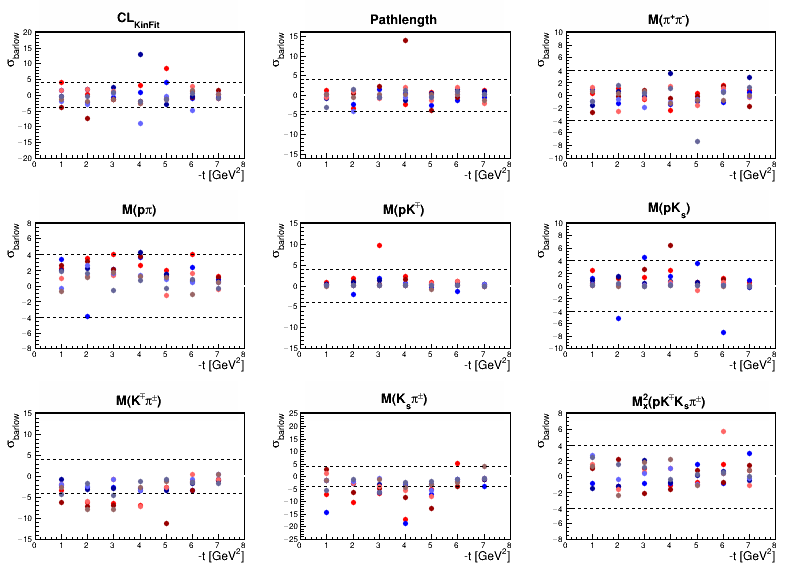

In [113]:
c.Clear()
c.Divide(3, 3)

# ROOT.gROOT.SetStyle("Plain")

variation_titles = ('CL_{KinFit}', 'Pathlength', 'M(#pi^{+}#pi^{-})', 'M(p#pi)', 'M(pK^{#mp})', 'M(pK_{s})', 'M(K^{#mp}#pi^{#pm})', 'M(K_{s}#pi^{#pm})', 'M_{x}^{2}(pK^{#mp}K_{s}#pi^{#pm})')
titles = []
y_lims = [20, 16, 10, 8, 15, 10, 15, 25, 8]
# y_lims = [100, 100, 100, 100, 100, 100, 100, 100, 100]

line_upper = ROOT.TLine(0, 4, 8, 4)
line_upper.SetLineColor(ROOT.kBlack)
line_upper.SetLineWidth(1)
line_upper.SetLineStyle(2)
line_lower = ROOT.TLine(0, -4, 8, -4)
line_lower.SetLineColor(ROOT.kBlack)
line_lower.SetLineWidth(1)
line_lower.SetLineStyle(2)
lines = [line_upper, line_lower]
hlist = []

for i, (gpip, gpim) in enumerate(zip(graphs_pipkmks, graphs_pimkpks)):
    pad = c.cd(i+1)
    pad.SetTopMargin(0.15)
    pad.SetBottomMargin(0.15)

    gpip[0].SetMarkerColor(ROOT.kBlue)
    gpip[1].SetMarkerColor(ROOT.kBlue+2)
    gpip[2].SetMarkerColor(ROOT.kBlue-7)
    gpip[3].SetMarkerColor(ROOT.kBlue-5)
    gpim[0].SetMarkerColor(ROOT.kRed)
    gpim[1].SetMarkerColor(ROOT.kRed+2)
    gpim[2].SetMarkerColor(ROOT.kRed-7)
    gpim[3].SetMarkerColor(ROOT.kRed-5)

    h = ROOT.TH1F(f"h{i}", "", 1, 0, 8)
    h.GetYaxis().SetRangeUser(-y_lims[i], y_lims[i])
    h.GetYaxis().SetTitle("#sigma_{barlow}")
    h.GetYaxis().SetTitleSize(0.08)
    h.GetYaxis().SetTitleOffset(0.7)
    h.GetYaxis().SetLabelSize(0.05)
    h.GetXaxis().SetLabelSize(0.05)
    h.GetXaxis().SetTitle("-t [GeV^{2}]")
    h.GetXaxis().SetTitleSize(0.06)
    h.GetXaxis().SetTitleOffset(0.8)

    h.GetXaxis().SetTitleSize(0.07)
    h.SetLineColor(0)
    hlist.append(h)
    hlist[i].Draw()

    # gpip[0].GetXaxis().SetRangeUser(0, 8)
    # gpip[0].GetYaxis().SetRangeUser(-y_lims[i], y_lims[i])
    # gpip[0].Draw("AP")
    for j in range(4):
        gpip[j].SetMarkerSize(0.5)
        # gpip[j].GetXaxis().SetRangeUser(-1, 10)
        gpip[j].GetYaxis().SetTitle("#sigma_{barlow}")
        gpip[j].GetXaxis().SetTitle("-t [GeV^{2}]")
        # gpip[i].SetOptTitle(1)
        gpip[j].SetMarkerStyle(20)
        gpim[j].SetMarkerSize(0.5)
        # gpim[j].GetXaxis().SetRangeUser(-1, 10)
        gpim[j].GetYaxis().SetTitle("#sigma_{barlow}")
        gpim[j].GetXaxis().SetTitle("-t [GeV^{2}]")
        # gpim[i].SetOptTitle(1)
        gpim[j].SetMarkerStyle(20)

        gpim[j].Draw("SAME P")
        gpip[j].Draw("SAME P")

    lines[0].Draw()
    lines[1].Draw()

    title = ROOT.TPaveText(0.05 + (i % 3) / 3.0, 0.93 - (i // 3) / 3.0, 0.3 + (i % 3) / 3.0, 1.0 - (i // 3) / 3.0, "brNDC")
    title.SetFillColorAlpha(0, 0)
    title.SetBorderSize(0)
    title.SetTextSize(0.025)
    title.SetTextAlign(22)
    title.AddText(variation_titles[i])
    titles.append(title)

c.cd()
for title in titles:
    title.Draw()

# x_label = ROOT.TPaveText(0.5, 0.01, 0.95, 0.05, "brNDC")
# x_label.SetFillColorAlpha(0, 0)
# x_label.SetBorderSize(0)
# x_label.SetTextSize(0.025)
# x_label.SetTextAlign(22)
# x_label.AddText("-t [GeV^{2}]")

# y_label = ROOT.TPaveText(0.0, 0.04, 0.1, 0.08, "brNDC")
# y_label.SetFillColorAlpha(0, 0)
# y_label.SetBorderSize(0)
# y_label.SetTextSize(0.025)
# y_label.SetTextAlign(22)
# y_label.AddText("#sigma_{barlow}")

# x_label.Draw()
# y_label.Draw()

c.Draw()

# ROOT.gStyle.SetOptTitle(0)


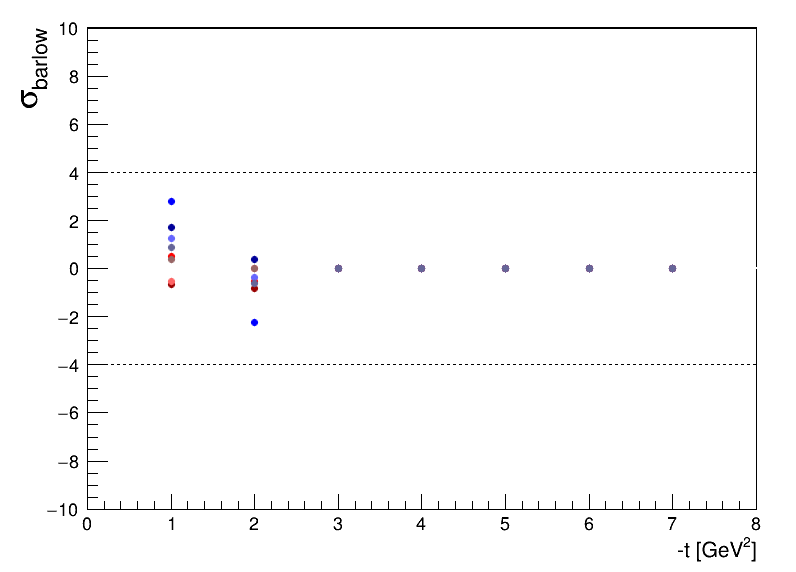

In [114]:
c.Clear()

pp_barlow_graphs_pipkmks = []
pp_barlow_graphs_pimkpks = []
pp_graph_pipkmks_8 = barlow_df.Filter('channel == "pipkmks"').Filter(f'e == 8').Filter(f'cut == "pp"').Graph('t', 'sigma_barlow')
pp_graph_pipkmks_9 = barlow_df.Filter('channel == "pipkmks"').Filter(f'e == 9').Filter(f'cut == "pp"').Graph('t', 'sigma_barlow')
pp_graph_pipkmks_10 = barlow_df.Filter('channel == "pipkmks"').Filter(f'e == 10').Filter(f'cut == "pp"').Graph('t', 'sigma_barlow')
pp_graph_pipkmks_11 = barlow_df.Filter('channel == "pipkmks"').Filter(f'e == 11').Filter(f'cut == "pp"').Graph('t', 'sigma_barlow')
pp_barlow_graphs_pipkmks.append((pp_graph_pipkmks_8, pp_graph_pipkmks_9, pp_graph_pipkmks_10, pp_graph_pipkmks_11))
pp_graph_pimkpks_8 = barlow_df.Filter('channel == "pimkpks"').Filter(f'e == 8').Filter(f'cut == "pp"').Graph('t', 'sigma_barlow')
pp_graph_pimkpks_9 = barlow_df.Filter('channel == "pimkpks"').Filter(f'e == 9').Filter(f'cut == "pp"').Graph('t', 'sigma_barlow')
pp_graph_pimkpks_10 = barlow_df.Filter('channel == "pimkpks"').Filter(f'e == 10').Filter(f'cut == "pp"').Graph('t', 'sigma_barlow')
pp_graph_pimkpks_11 = barlow_df.Filter('channel == "pimkpks"').Filter(f'e == 11').Filter(f'cut == "pp"').Graph('t', 'sigma_barlow')
pp_barlow_graphs_pimkpks.append((pp_graph_pimkpks_8, pp_graph_pimkpks_9, pp_graph_pimkpks_10, pp_graph_pimkpks_11))

h = ROOT.TH1F(f"h", "", 1, 0, 8)
h.GetYaxis().SetRangeUser(-10, 10)
h.GetYaxis().SetTitle("#sigma_{barlow}")
h.GetYaxis().SetTitleSize(0.06)
h.GetYaxis().SetTitleOffset(0.7)
# h.GetYaxis().SetLabelSize(0.05)
# h.GetXaxis().SetLabelSize(0.05)
h.GetXaxis().SetTitle("-t [GeV^{2}]")
# h.GetXaxis().SetTitleSize(0.04)
# h.GetXaxis().SetTitleOffset(0.8)

# h.GetXaxis().SetTitleSize(0.07)
h.SetLineColor(0)

h.Draw()

pp_graph_pipkmks_8.SetMarkerColor(ROOT.kBlue)
pp_graph_pipkmks_9.SetMarkerColor(ROOT.kBlue+2)
pp_graph_pipkmks_10.SetMarkerColor(ROOT.kBlue-7)
pp_graph_pipkmks_11.SetMarkerColor(ROOT.kBlue-5)
pp_graph_pimkpks_8.SetMarkerColor(ROOT.kRed)
pp_graph_pimkpks_9.SetMarkerColor(ROOT.kRed+2)
pp_graph_pimkpks_10.SetMarkerColor(ROOT.kRed-7)
pp_graph_pimkpks_11.SetMarkerColor(ROOT.kRed-5)


for i, (pgp, pgm) in enumerate(zip(pp_barlow_graphs_pipkmks, pp_barlow_graphs_pimkpks)):
    for j in range(4):
        pgp[j].SetMarkerSize(0.8)
        pgp[j].GetYaxis().SetTitle("#sigma_{barlow}")
        pgp[j].GetXaxis().SetTitle("-t [GeV^{2}]")
        pgp[j].SetMarkerStyle(20)
        pgm[j].SetMarkerSize(0.8)
        pgm[j].GetYaxis().SetTitle("#sigma_{barlow}")
        pgm[j].GetXaxis().SetTitle("-t [GeV^{2}]")
        pgm[j].SetMarkerStyle(20)

        pgm[j].Draw("SAME P")
        pgp[j].Draw("SAME P")

lines[0].Draw()
lines[1].Draw()

c.Draw()



## Cross Section With All Errors

In [118]:
df_cs_final_pipkmks = pd.read_csv('/work/halld/home/viducic/data/fit_params/pipkmks/cs_final.csv')
df_cs_final_pimkpks = pd.read_csv('/work/halld/home/viducic/data/fit_params/pimkpks/cs_final.csv')

df_cs_final_pipkmks['cs_err'] = np.where(True, df_cs_final_pipkmks['cross_section'] * df_cs_final_pipkmks['total_percent_error'], 0)
df_cs_final_pimkpks['cs_err'] = np.where(True, df_cs_final_pimkpks['cross_section'] * df_cs_final_pipkmks['total_percent_error'], 0)

final_cs_graphs_pipkmks = []
final_cs_graphs_pimkpks = []

cs_final_grouped_pipkmks = df_cs_final_pipkmks.groupby('beam_energy')
cs_final_grouped_pipmkps = df_cs_final_pimkpks.groupby('beam_energy')

for beam_energy, group in cs_final_grouped_pipkmks:
    graph_pipkmks = ROOT.TGraphErrors(len(group.t_bin_middle.to_numpy()), group.t_bin_middle.to_numpy(), group.cross_section.to_numpy(), group.t_bin_width.to_numpy(), group.cs_err.to_numpy())

